# Importing Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

### Loading the datasets:

In [2]:
# Loading the datasets:
sparkling_data = pd.read_csv('sparkling.csv')
rose_data = pd.read_csv('rose.csv')

In [3]:
sparkling_data

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


In [4]:
rose_data

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [5]:
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
rose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


# Define the problem and perform Exploratory Data Analysis:

### Problem definition:

The primary objective of this project is to analyze and forecast the sales trends of sparkling and rose wines using historical data provided by ABC Estate Wines. By employing time series analysis and forecasting techniques, we aim to:

* Identify key trends and seasonal patterns in the sales data.
* Build accurate forecasting models to predict future sales.
* Provide actionable insights and recommendations to optimize sales strategies.

## Reading the data as an appropriate time series data:

In [7]:
# Converting YearMonth to datetime format:
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'])
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'])

# Setting YearMonth as the index:
sparkling_data.set_index('YearMonth', inplace=True)
rose_data.set_index('YearMonth', inplace=True)


In [8]:
# Display the first few rows of each dataframe to verify:
sparkling_data.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [9]:
rose_data.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


##  Plotting the data:

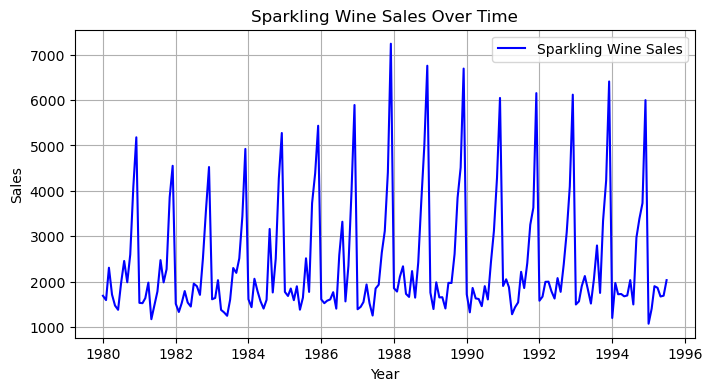

In [10]:
## Plotting the Sparkling Wine Sales data:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_data, label='Sparkling Wine Sales', color='blue')
plt.title('Sparkling Wine Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

#### Sparkling Wine Sales Over Time
* Trend: 
The sales of sparkling wine show a generally increasing trend from 1980 to 1995.
* Seasonality: 
There is a clear seasonal pattern, with sales peaking regularly each year. The peaks seem to occur around the same time each year, indicating a strong seasonal component.
* Sales Levels: 
Sales fluctuate between 1000 and 7000 units, with peaks around 5000 to 7000 units.

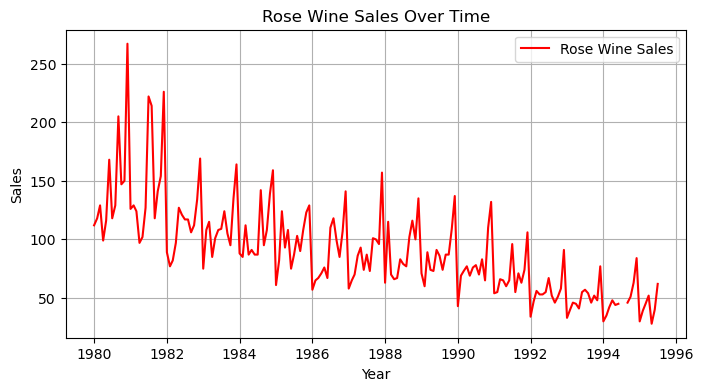

In [11]:
# Plotting the Rose Wine Sales data:
plt.figure(figsize=(8, 4))
plt.plot(rose_data, label='Rose Wine Sales', color='red')
plt.title('Rose Wine Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

#### Rose Wine Sales Over Time

* Trend: The sales of rose wine show a declining trend from 1980 to 1995.
* Seasonality: There is a noticeable seasonal pattern, but it is less pronounced compared to sparkling wine. The peaks in sales are less regular.
* Sales Levels: Sales fluctuate between 0 and 250 units, with the highest peaks occurring in the early 1980s.


## Perform EDA :

In [12]:
# Summary statistics:
print("\nSummary statistics for sparkling_data:")
sparkling_data.describe()


Summary statistics for sparkling_data:


,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [13]:
print("\nSummary statistics for rose_data:")
rose_data.describe()


Summary statistics for rose_data:


,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


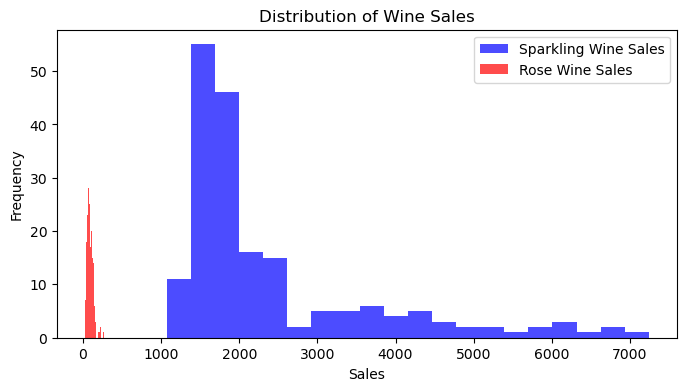

In [14]:
# Plotting histograms:
plt.figure(figsize=(8, 4))
plt.hist(sparkling_data['Sparkling'], bins=20, color='blue', alpha=0.7, label='Sparkling Wine Sales')
plt.hist(rose_data['Rose'], bins=20, color='red', alpha=0.7, label='Rose Wine Sales')
plt.title('Distribution of Wine Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

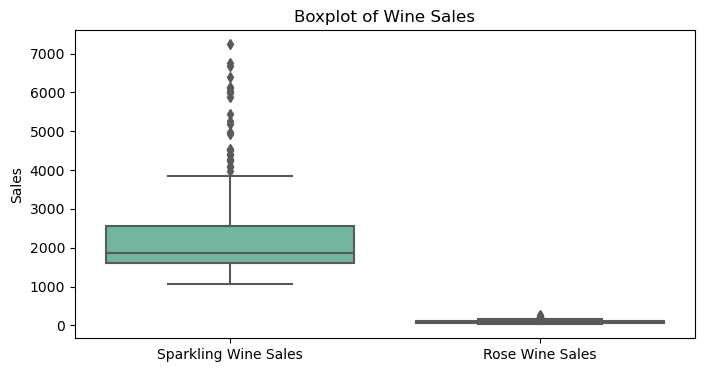

In [15]:
# Plotting boxplots:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(data=[sparkling_data['Sparkling'], rose_data['Rose']], palette="Set2")
plt.title('Boxplot of Wine Sales')
plt.xticks([0, 1], ['Sparkling Wine Sales', 'Rose Wine Sales'])
plt.ylabel('Sales')
plt.show()

In [16]:
# Correlation Analysis:
combined_data = pd.concat([sparkling_data, rose_data], axis=1)
correlation = combined_data.corr()
print("\nCorrelation between Sparkling and Rose Wine Sales:")
print(correlation)


Correlation between Sparkling and Rose Wine Sales:
           Sparkling      Rose
Sparkling   1.000000  0.404579
Rose        0.404579  1.000000


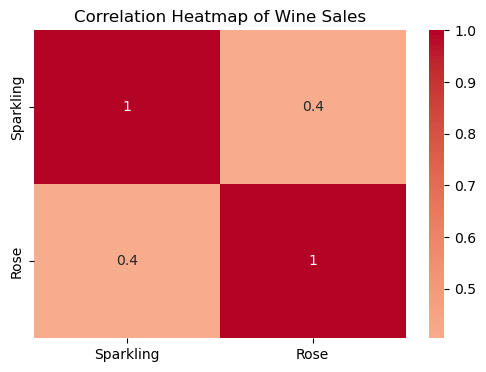

In [18]:
# Heatmap of the correlation:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Wine Sales')
plt.show()

## Perform Decomposition:

In [19]:
## Handling missing values in rose_data:
rose_data['Rose'].fillna(method='ffill', inplace=True)


<Figure size 1200x800 with 0 Axes>

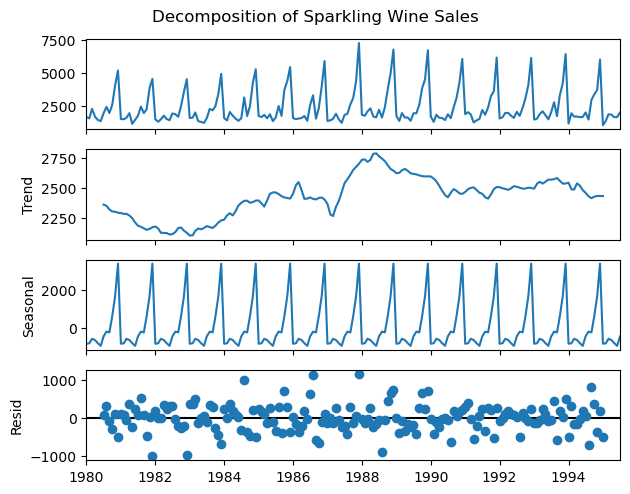

<Figure size 1200x800 with 0 Axes>

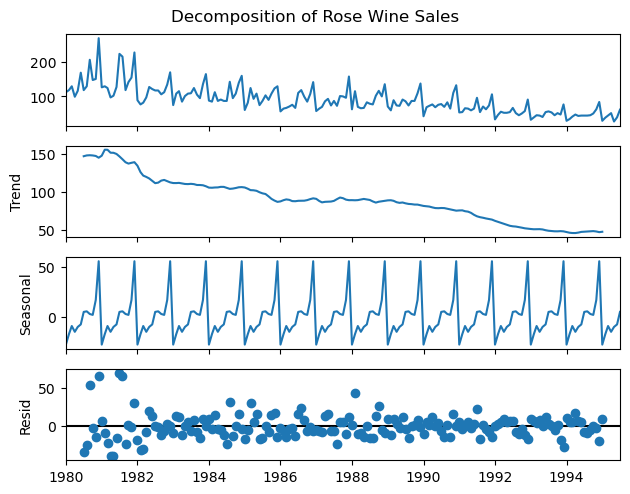

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing decomposition for Sparkling Wine Sales:
sparkling_decomposition = seasonal_decompose(sparkling_data, model='additive')

# Plotting the decomposition for Sparkling Wine Sales:
plt.figure(figsize=(12, 8))
sparkling_decomposition.plot()
plt.suptitle('Decomposition of Sparkling Wine Sales', y=1.02)
plt.show()

# Performing decomposition for Rose Wine Sales:
rose_decomposition = seasonal_decompose(rose_data, model='additive')

# Plotting the decomposition for Rose Wine Sales:
plt.figure(figsize=(12, 8))
rose_decomposition.plot()
plt.suptitle('Decomposition of Rose Wine Sales', y=1.02)
plt.show()

#### Decomposition of Sparkling  Wine Sales:

* Trend Component:
The “Trend” plot reveals a gradual upward trend over the same period.
This indicates overall growth in sparkling wine sales.
* Seasonal Variations:
The “Seasonal” plot exhibits sharp spikes at regular intervals.
These spikes represent seasonal variations (e.g., higher sales during holidays or specific seasons).
* Residuals (Noise):
The “Resid” plot shows random scatter around the zero line.
Residuals represent unexplained variation after accounting for trend and seasonality.

#### Decomposition of Rose Wine Sales

* Trend Component: The trend component shows a steady decline in rose wine sales over the years.
* Seasonal Component: The seasonal component reveals a consistent pattern of sales peaking at regular intervals, indicating seasonality in the data.
* Residual Component: The residual component shows random fluctuations around the zero line, indicating variability that is not explained by the trend or seasonal components.

#### Summary
* Sparkling Wine: Exhibits a strong and increasing trend with pronounced seasonality. Sales peaks are regular and significant, showing high variability throughout the year.
* Rose Wine: Shows a declining trend with less pronounced seasonality. Sales peaks are less consistent and decline over time, indicating a decrease in popularity or demand.

# Data Pre-processing:

## Missing value treatment:

In [21]:
# Showcasing missing values before treatment:
print("Missing values in sparkling_data before treatment:")
print(sparkling_data.isnull().sum())

print("\nMissing values in rose_data before treatment:")
print(rose_data.isnull().sum())

Missing values in sparkling_data before treatment:
Sparkling    0
dtype: int64

Missing values in rose_data before treatment:
Rose    0
dtype: int64


In [22]:
# Handling missing values using forward fill for the entire dataset:
sparkling_data.fillna(method='ffill', inplace=True)
rose_data.fillna(method='ffill', inplace=True)

# Showcasing missing values after treatment:
print("\nMissing values in sparkling_data after treatment:")
print(sparkling_data.isnull().sum())

print("\nMissing values in rose_data after treatment:")
print(rose_data.isnull().sum())


Missing values in sparkling_data after treatment:
Sparkling    0
dtype: int64

Missing values in rose_data after treatment:
Rose    0
dtype: int64


During decomposition we have done the missing value treatment for rose_data.

## Visualize the processed data:

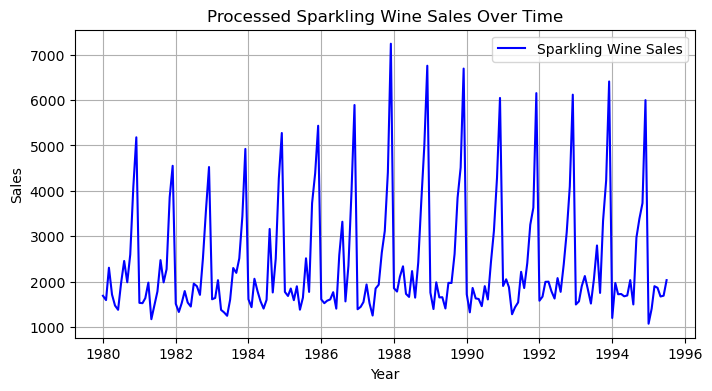

In [23]:
# Plotting the processed data for Sparkling Wine Sales:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_data, label='Sparkling Wine Sales', color='blue')
plt.title('Processed Sparkling Wine Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

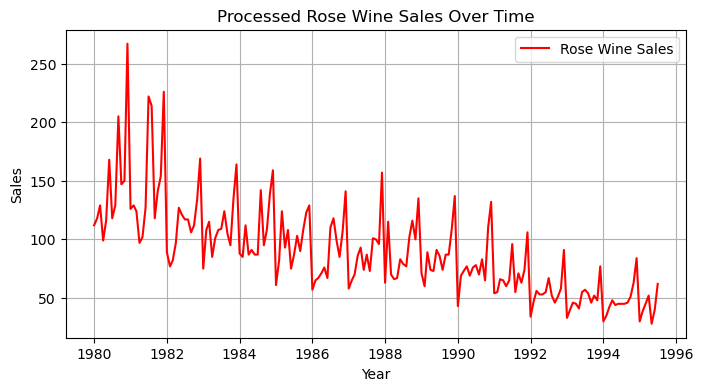

In [24]:
# Plotting the processed data for Rose Wine Sales:
plt.figure(figsize=(8, 4))
plt.plot(rose_data, label='Rose Wine Sales', color='red')
plt.title('Processed Rose Wine Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Train-test split:

In [25]:
# Defining the train-test split function:
def train_test_split_time_series(data, test_size=0.2):
    n = len(data)
    train_size = int((1 - test_size) * n)
    train, test = data[:train_size], data[train_size:]
    return train, test

# Splitting the data:
train_sparkling, test_sparkling = train_test_split_time_series(sparkling_data)
train_rose, test_rose = train_test_split_time_series(rose_data)

# Displaying the shapes of the splits:
print(f"Train Sparkling Shape: {train_sparkling.shape}, Test Sparkling Shape: {test_sparkling.shape}")
print(f"Train Rose Shape: {train_rose.shape}, Test Rose Shape: {test_rose.shape}")

Train Sparkling Shape: (149, 1), Test Sparkling Shape: (38, 1)
Train Rose Shape: (149, 1), Test Rose Shape: (38, 1)


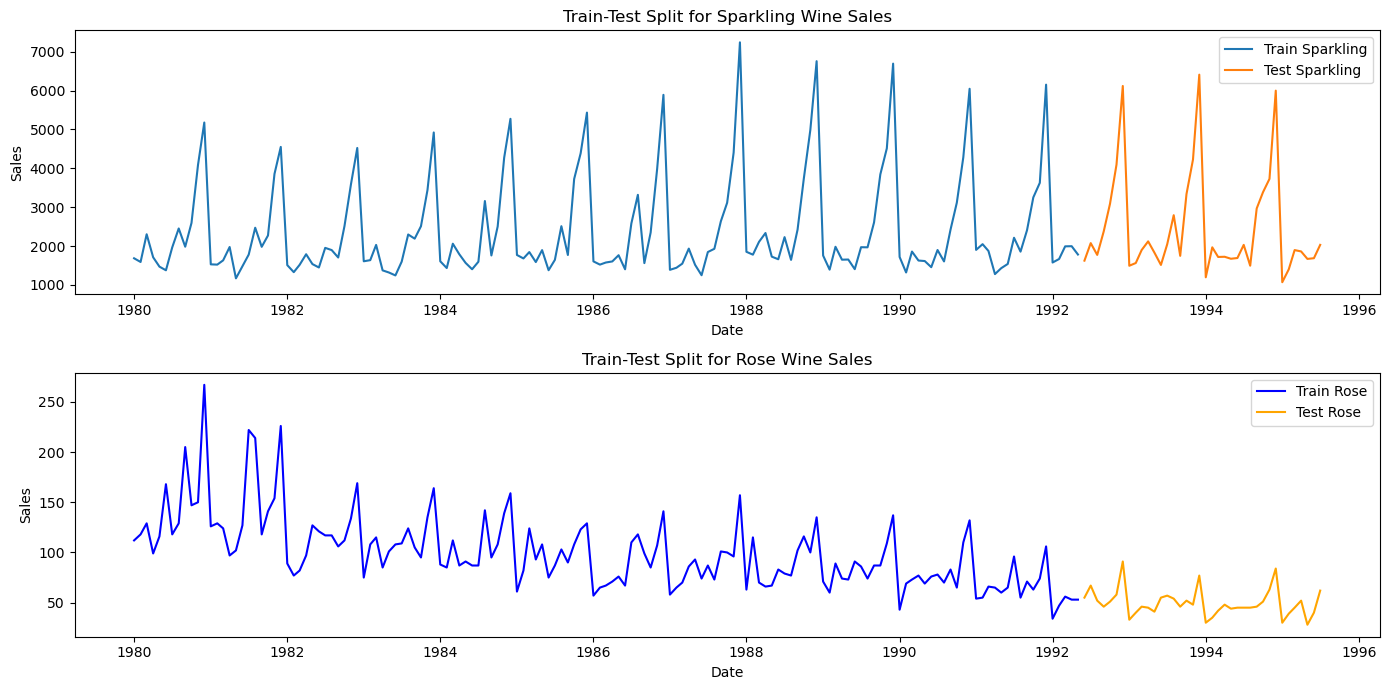

In [26]:
#plotting the train-test split:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(train_sparkling, label='Train Sparkling')
plt.plot(test_sparkling, label='Test Sparkling')
plt.title('Train-Test Split for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train_rose, label='Train Rose', color='blue')
plt.plot(test_rose, label='Test Rose', color='orange')
plt.title('Train-Test Split for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# Model Building - Original Data:

## Build forecasting models :

### ARIMA Model for Sparkling Wine Sales:

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


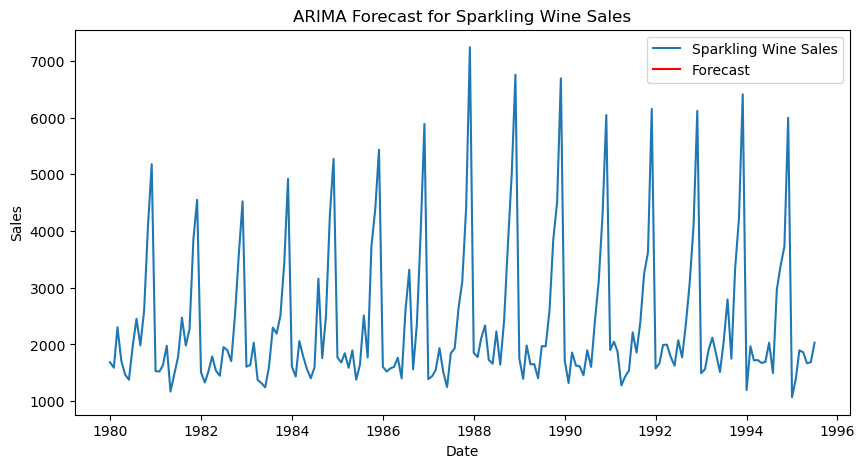

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fitting ARIMA model on the full data:
model_sparkling = ARIMA(sparkling_data, order=(5, 1, 0))
model_sparkling_fit = model_sparkling.fit()

# Forecasting:
forecast_steps = 12
forecast_sparkling = model_sparkling_fit.forecast(steps=forecast_steps)

# Creating a DataFrame for the forecast:
forecast_dates = pd.date_range(start=sparkling_data.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_sparkling_df = pd.DataFrame({'Sparkling': forecast_sparkling}, index=forecast_dates[1:])

# Combining with the original data:
sparkling_forecast = pd.concat([sparkling_data, forecast_sparkling_df])

# Plotting the results:
plt.figure(figsize=(10, 5))
plt.plot(sparkling_data, label='Sparkling Wine Sales')
plt.plot(forecast_sparkling_df, label='Forecast', color='red')
plt.title('ARIMA Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### ARIMA Model for Rose Wine Sales:

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


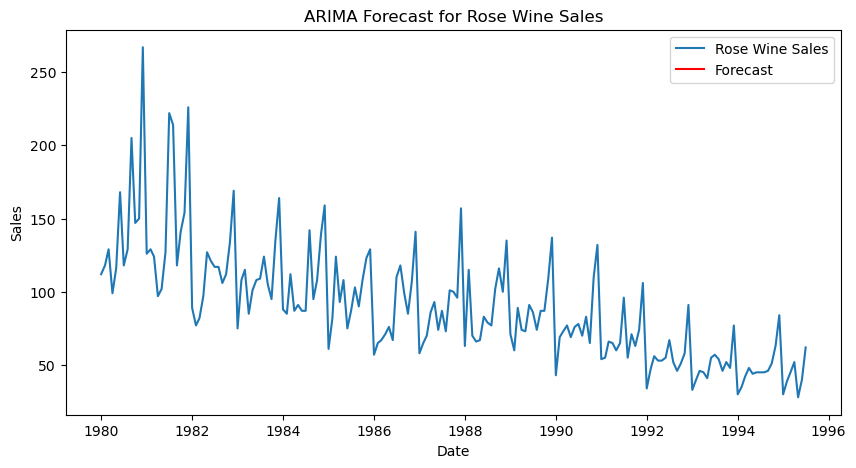

In [29]:
# Fitting ARIMA model on the full data:
model_rose = ARIMA(rose_data, order=(5, 1, 0))
model_rose_fit = model_rose.fit()

# Forecasting:
forecast_steps = 12
forecast_rose = model_rose_fit.forecast(steps=forecast_steps)

# Creating a DataFrame for the forecast:
forecast_dates = pd.date_range(start=rose_data.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_rose_df = pd.DataFrame({'Rose': forecast_rose}, index=forecast_dates[1:])

# Combining with the original data:
rose_forecast = pd.concat([rose_data, forecast_rose_df])

# Plotting the results:
plt.figure(figsize=(10, 5))
plt.plot(rose_data, label='Rose Wine Sales')
plt.plot(forecast_rose_df, label='Forecast', color='red')
plt.title('ARIMA Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### SARIMA Model for Sparkling Wine Sales:

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


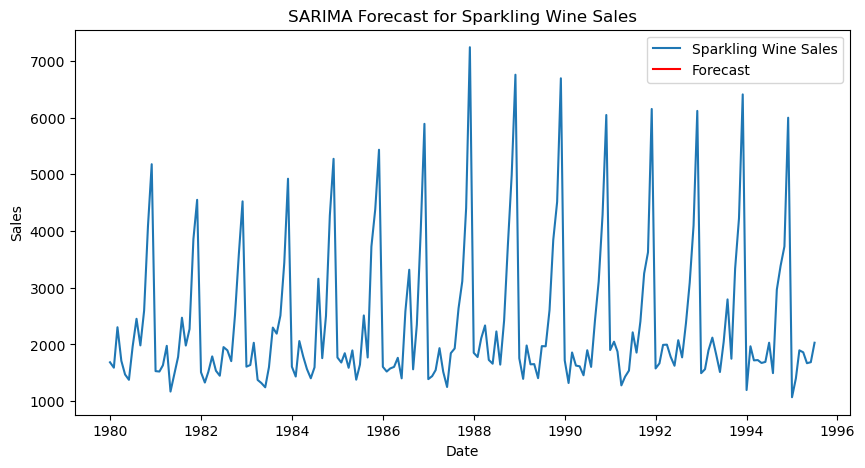

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting SARIMA model on the full data:
model_sparkling_sarima = SARIMAX(sparkling_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_sparkling_sarima_fit = model_sparkling_sarima.fit()

# Forecasting:
forecast_steps = 12
forecast_sparkling_sarima = model_sparkling_sarima_fit.forecast(steps=forecast_steps)

# Creating a DataFrame for the forecast:
forecast_dates = pd.date_range(start=sparkling_data.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_sparkling_sarima_df = pd.DataFrame({'Sparkling': forecast_sparkling_sarima}, index=forecast_dates[1:])

# Combining with the original data:
sparkling_sarima_forecast = pd.concat([sparkling_data, forecast_sparkling_sarima_df])

# Plotting the results:
plt.figure(figsize=(10, 5))
plt.plot(sparkling_data, label='Sparkling Wine Sales')
plt.plot(forecast_sparkling_sarima_df, label='Forecast', color='red')
plt.title('SARIMA Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### SARIMA Model for Rose Wine Sales:

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


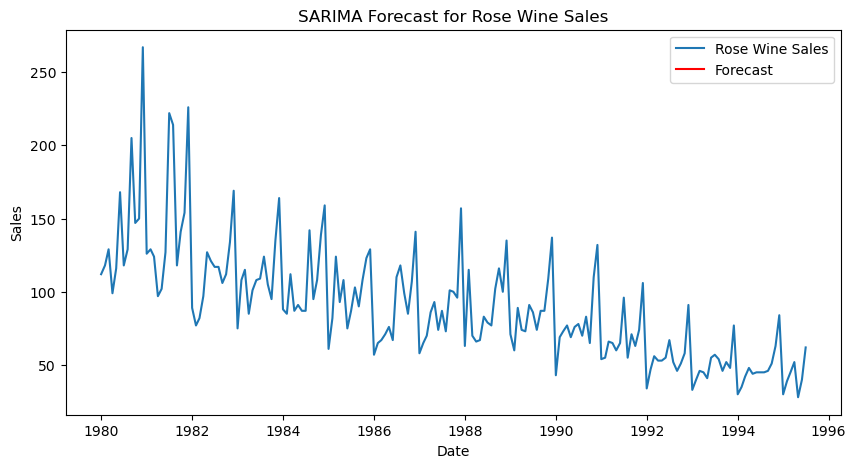

In [31]:
# Fitting SARIMA model on the full data:
model_rose_sarima = SARIMAX(rose_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_rose_sarima_fit = model_rose_sarima.fit()

# Forecasting:
forecast_steps = 12
forecast_rose_sarima = model_rose_sarima_fit.forecast(steps=forecast_steps)

# Creating a DataFrame for the forecast:
forecast_dates = pd.date_range(start=rose_data.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_rose_sarima_df = pd.DataFrame({'Rose': forecast_rose_sarima}, index=forecast_dates[1:])

# Combining with the original data:
rose_sarima_forecast = pd.concat([rose_data, forecast_rose_sarima_df])

# Plotting the results:
plt.figure(figsize=(10, 5))
plt.plot(rose_data, label='Rose Wine Sales')
plt.plot(forecast_rose_sarima_df, label='Forecast', color='red')
plt.title('SARIMA Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Linear regression :

In [32]:
from sklearn.linear_model import LinearRegression

# Ensuring the index is a datetime object:
sparkling_data.index = pd.to_datetime(sparkling_data.index)
rose_data.index = pd.to_datetime(rose_data.index)

# Converting the datetime index to an ordinal integer:
sparkling_data['Time'] = sparkling_data.index.map(lambda x: x.toordinal())
rose_data['Time'] = rose_data.index.map(lambda x: x.toordinal())

# Train-test split:
train_sparkling = sparkling_data.iloc[:149]
test_sparkling = sparkling_data.iloc[149:]
train_rose = rose_data.iloc[:149]
test_rose = rose_data.iloc[149:]

# Linear Regression Model for Sparkling Wine:
X_train_sparkling = train_sparkling['Time'].values.reshape(-1, 1)
y_train_sparkling = train_sparkling['Sparkling']
X_test_sparkling = test_sparkling['Time'].values.reshape(-1, 1)

model_sparkling_lr = LinearRegression()
model_sparkling_lr.fit(X_train_sparkling, y_train_sparkling)
forecast_sparkling_lr = model_sparkling_lr.predict(X_test_sparkling)

# Linear Regression Model for Rose Wine:
X_train_rose = train_rose['Time'].values.reshape(-1, 1)
y_train_rose = train_rose['Rose']
X_test_rose = test_rose['Time'].values.reshape(-1, 1)

model_rose_lr = LinearRegression()
model_rose_lr.fit(X_train_rose, y_train_rose)
forecast_rose_lr = model_rose_lr.predict(X_test_rose)


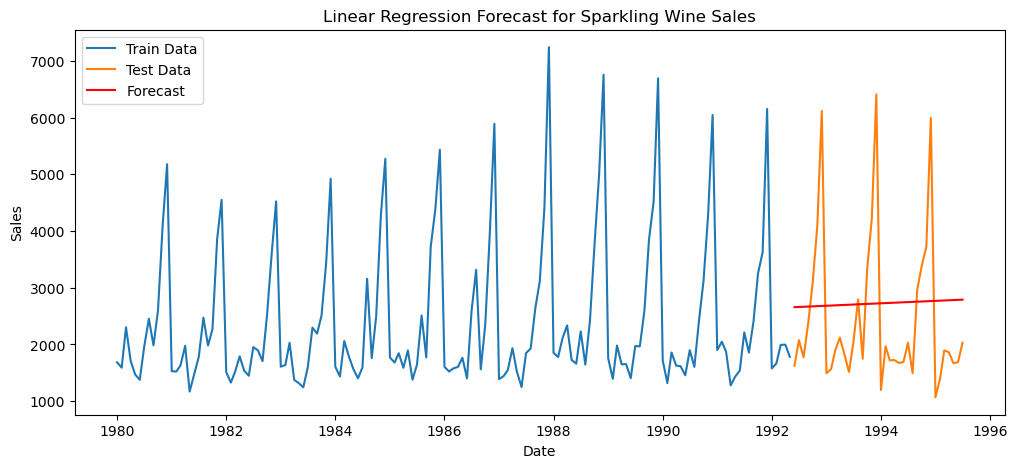

In [33]:
# Plotting the results for Sparkling Wine:
plt.figure(figsize=(12, 5))
plt.plot(train_sparkling.index, train_sparkling['Sparkling'], label='Train Data')
plt.plot(test_sparkling.index, test_sparkling['Sparkling'], label='Test Data')
plt.plot(test_sparkling.index, forecast_sparkling_lr, label='Forecast', color='red')
plt.title('Linear Regression Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

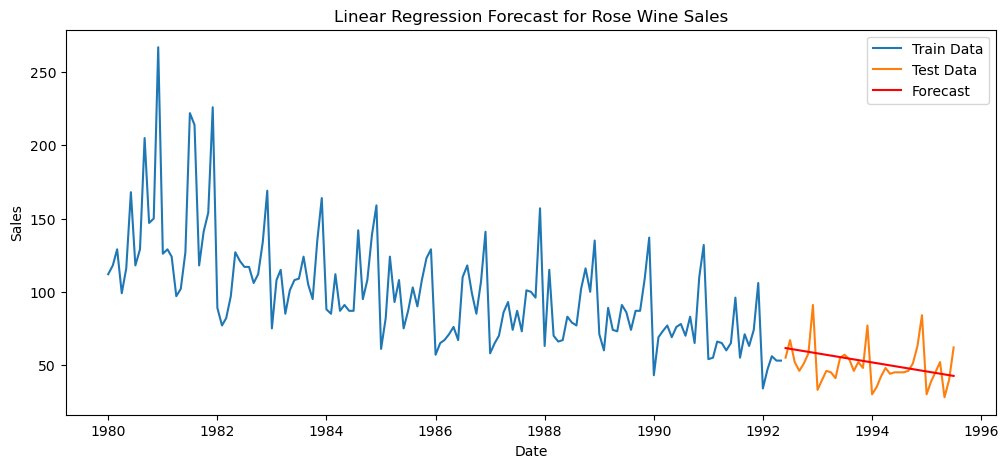

In [34]:
# Plotting the results for Rose Wine
plt.figure(figsize=(12, 5))
plt.plot(train_rose.index, train_rose['Rose'], label='Train Data')
plt.plot(test_rose.index, test_rose['Rose'], label='Test Data')
plt.plot(test_rose.index, forecast_rose_lr, label='Forecast', color='red')
plt.title('Linear Regression Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Simple Average:

### Simple Average for Sparkling Sales:

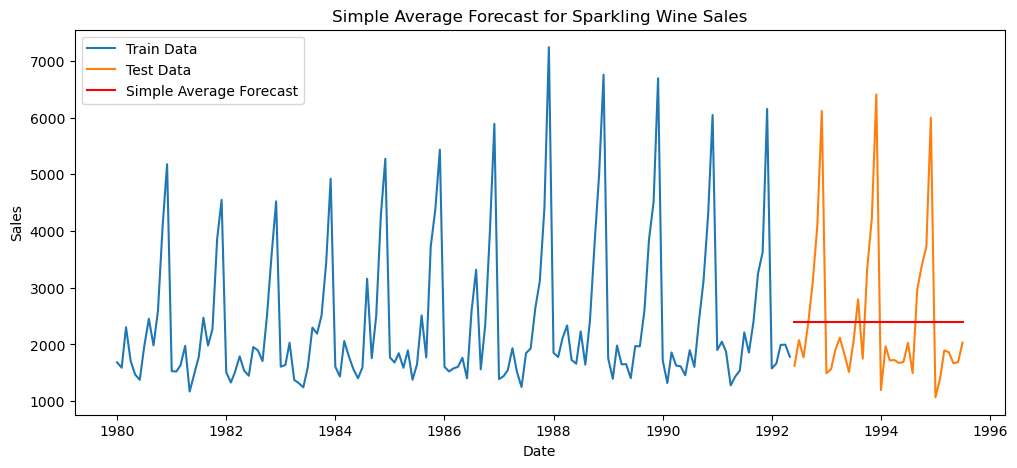

In [35]:
# Assuming sparkling_data is already loaded and indexed correctly:
train_sparkling = sparkling_data.iloc[:149]
test_sparkling = sparkling_data.iloc[149:]

# Calculating Simple Average:
avg_sparkling = train_sparkling['Sparkling'].mean()
forecast_sparkling_avg = pd.Series(avg_sparkling, index=test_sparkling.index)

# Plotting the results:
plt.figure(figsize=(12, 5))
plt.plot(train_sparkling.index, train_sparkling['Sparkling'], label='Train Data')
plt.plot(test_sparkling.index, test_sparkling['Sparkling'], label='Test Data')
plt.plot(test_sparkling.index, forecast_sparkling_avg, label='Simple Average Forecast', color='red')
plt.title('Simple Average Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Simple Average for Rose wine Sales:

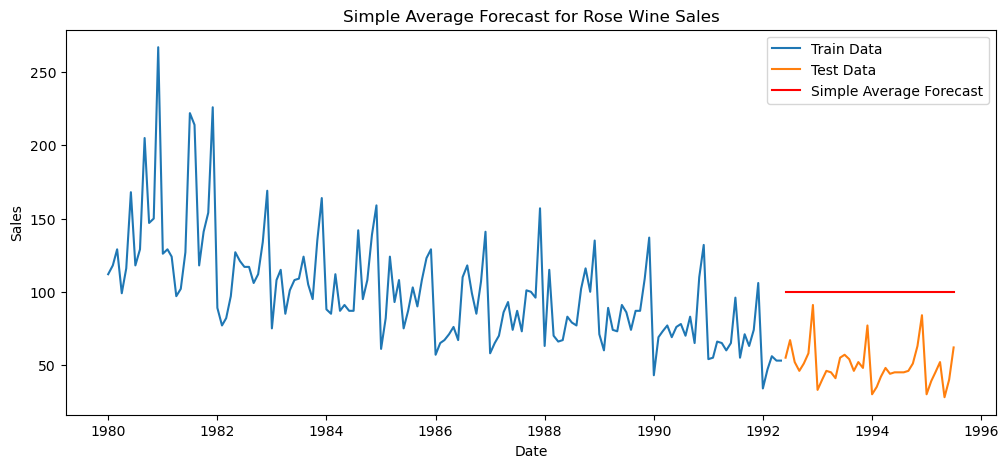

In [37]:
# Assuming rose_data is already loaded and indexed correctly
train_rose = rose_data.iloc[:149]
test_rose = rose_data.iloc[149:]

# Calculate Simple Average
avg_rose = train_rose['Rose'].mean()
forecast_rose_avg = pd.Series(avg_rose, index=test_rose.index)

# Plotting the results
plt.figure(figsize=(12, 5))
plt.plot(train_rose.index, train_rose['Rose'], label='Train Data')
plt.plot(test_rose.index, test_rose['Rose'], label='Test Data')
plt.plot(test_rose.index, forecast_rose_avg, label='Simple Average Forecast', color='red')
plt.title('Simple Average Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Moving Average:

### Moving Average for Sparkling Sales:

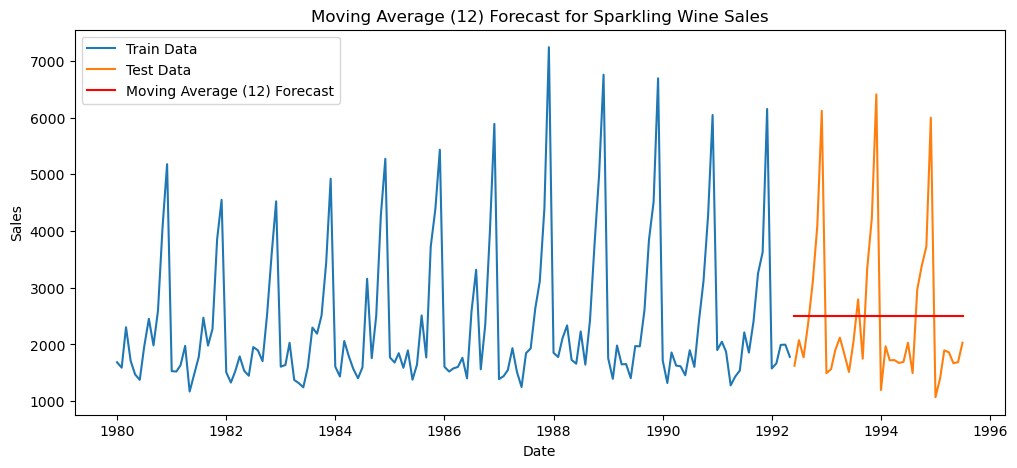

In [38]:
# Assuming sparkling_data is already loaded and indexed correctly:
train_sparkling = sparkling_data.iloc[:149]
test_sparkling = sparkling_data.iloc[149:]

# Calculating Moving Average with window size 12 (for yearly average):
window_size = 12
moving_avg_sparkling = train_sparkling['Sparkling'].rolling(window=window_size).mean()
forecast_sparkling_ma = moving_avg_sparkling.iloc[-1]  

# Plotting the results
plt.figure(figsize=(12, 5))
plt.plot(train_sparkling.index, train_sparkling['Sparkling'], label='Train Data')
plt.plot(test_sparkling.index, test_sparkling['Sparkling'], label='Test Data')
plt.plot(test_sparkling.index, pd.Series(forecast_sparkling_ma, index=test_sparkling.index), label=f'Moving Average ({window_size}) Forecast', color='red')
plt.title(f'Moving Average ({window_size}) Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Moving Average for Rose wine Sales:

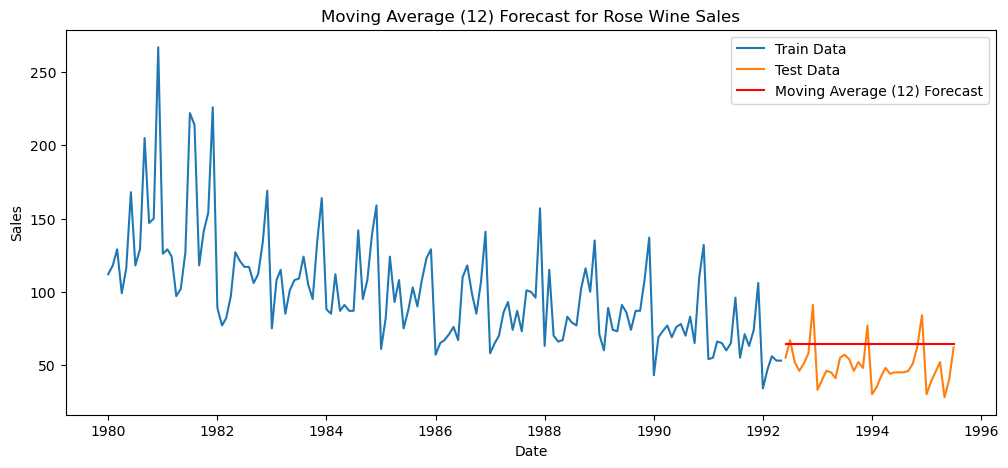

In [39]:
# Assuming rose_data is already loaded and indexed correctly:
train_rose = rose_data.iloc[:149]
test_rose = rose_data.iloc[149:]

# Calculating Moving Average with window size 12 (for yearly average):
moving_avg_rose = train_rose['Rose'].rolling(window=window_size).mean()
forecast_rose_ma = moving_avg_rose.iloc[-1]  

# Plotting the results:
plt.figure(figsize=(12, 5))
plt.plot(train_rose.index, train_rose['Rose'], label='Train Data')
plt.plot(test_rose.index, test_rose['Rose'], label='Test Data')
plt.plot(test_rose.index, pd.Series(forecast_rose_ma, index=test_rose.index), label=f'Moving Average ({window_size}) Forecast', color='red')
plt.title(f'Moving Average ({window_size}) Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Exponential Models (Single, Double, Triple) :

### Single Exponential Smoothing (Simple Exponential Smoothing):

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


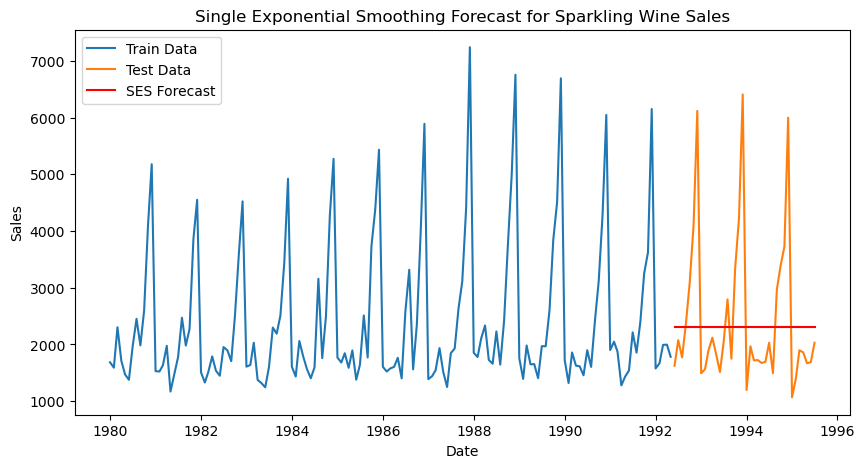

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


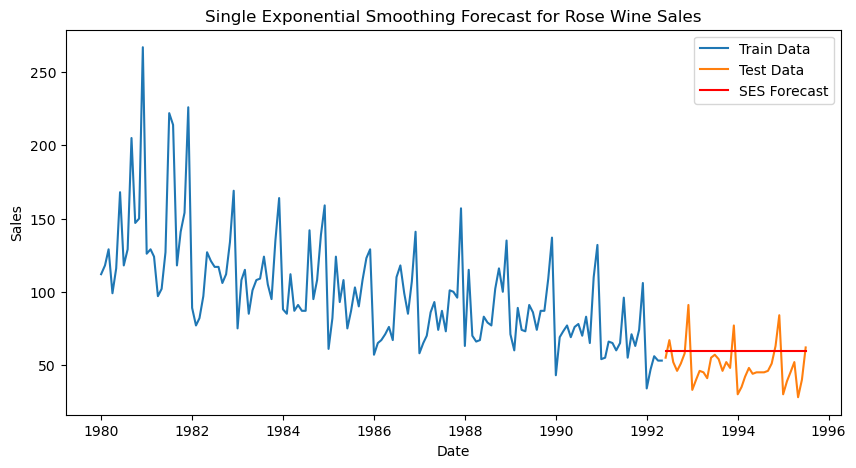

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming sparkling_data and rose_data are already loaded and indexed correctly:
train_sparkling = sparkling_data.iloc[:149]
test_sparkling = sparkling_data.iloc[149:]
train_rose = rose_data.iloc[:149]
test_rose = rose_data.iloc[149:]

# Single Exponential Smoothing for Sparkling Wine:
model_sparkling_ses = SimpleExpSmoothing(train_sparkling['Sparkling'])
model_sparkling_ses_fit = model_sparkling_ses.fit(smoothing_level=0.2)  # You can adjust smoothing level (alpha) as needed
forecast_sparkling_ses = model_sparkling_ses_fit.forecast(len(test_sparkling))

# Plotting the results for Sparkling Wine:
plt.figure(figsize=(10, 5))
plt.plot(train_sparkling.index, train_sparkling['Sparkling'], label='Train Data')
plt.plot(test_sparkling.index, test_sparkling['Sparkling'], label='Test Data')
plt.plot(test_sparkling.index, forecast_sparkling_ses, label='SES Forecast', color='red')
plt.title('Single Exponential Smoothing Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Single Exponential Smoothing for Rose Wine:
model_rose_ses = SimpleExpSmoothing(train_rose['Rose'])
model_rose_ses_fit = model_rose_ses.fit(smoothing_level=0.2)  # You can adjust smoothing level (alpha) as needed
forecast_rose_ses = model_rose_ses_fit.forecast(len(test_rose))

# Plotting the results for Rose Wine
plt.figure(figsize=(10, 5))
plt.plot(train_rose.index, train_rose['Rose'], label='Train Data')
plt.plot(test_rose.index, test_rose['Rose'], label='Test Data')
plt.plot(test_rose.index, forecast_rose_ses, label='SES Forecast', color='red')
plt.title('Single Exponential Smoothing Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Double Exponential Smoothing (Holt's Linear Trend Model):

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


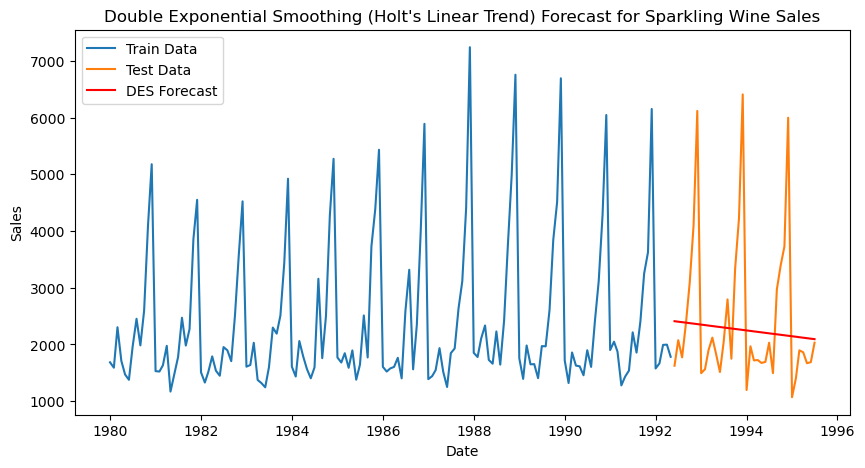

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


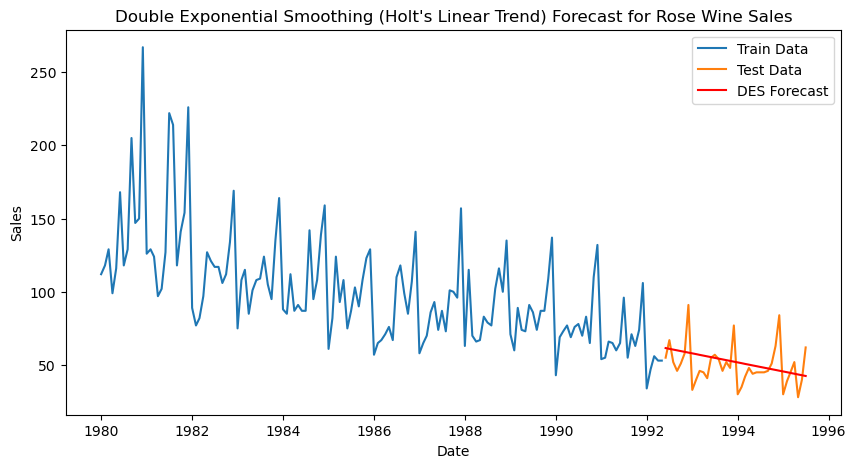

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double Exponential Smoothing for Sparkling Wine (Holt's Linear Trend Model):
model_sparkling_des = ExponentialSmoothing(train_sparkling['Sparkling'], trend='add')
model_sparkling_des_fit = model_sparkling_des.fit()
forecast_sparkling_des = model_sparkling_des_fit.forecast(len(test_sparkling))

# Plotting the results for Sparkling Wine:
plt.figure(figsize=(10, 5))
plt.plot(train_sparkling.index, train_sparkling['Sparkling'], label='Train Data')
plt.plot(test_sparkling.index, test_sparkling['Sparkling'], label='Test Data')
plt.plot(test_sparkling.index, forecast_sparkling_des, label='DES Forecast', color='red')
plt.title('Double Exponential Smoothing (Holt\'s Linear Trend) Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Double Exponential Smoothing for Rose Wine (Holt's Linear Trend Model):
model_rose_des = ExponentialSmoothing(train_rose['Rose'], trend='add')
model_rose_des_fit = model_rose_des.fit()
forecast_rose_des = model_rose_des_fit.forecast(len(test_rose))

# Plotting the results for Rose Wine:
plt.figure(figsize=(10, 5))
plt.plot(train_rose.index, train_rose['Rose'], label='Train Data')
plt.plot(test_rose.index, test_rose['Rose'], label='Test Data')
plt.plot(test_rose.index, forecast_rose_des, label='DES Forecast', color='red')
plt.title('Double Exponential Smoothing (Holt\'s Linear Trend) Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Triple Exponential Smoothing (Holt-Winters Model):

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


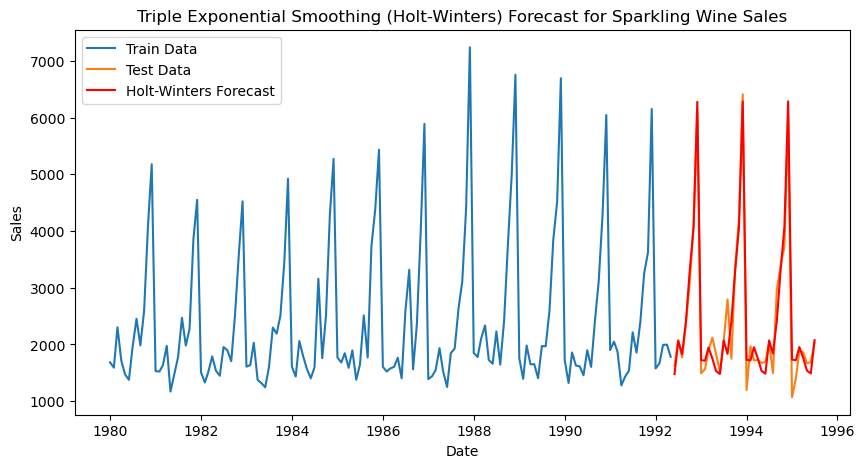

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


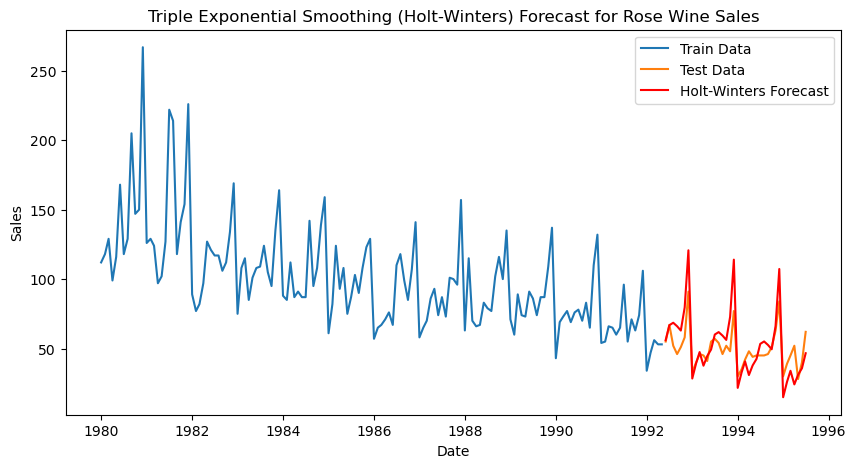

In [42]:
# Triple Exponential Smoothing (Holt-Winters) for Sparkling Wine:
model_sparkling_hw = ExponentialSmoothing(train_sparkling['Sparkling'], trend='add', seasonal='add', seasonal_periods=12)
model_sparkling_hw_fit = model_sparkling_hw.fit()
forecast_sparkling_hw = model_sparkling_hw_fit.forecast(len(test_sparkling))

# Plotting the results for Sparkling Wine:
plt.figure(figsize=(10, 5))
plt.plot(train_sparkling.index, train_sparkling['Sparkling'], label='Train Data')
plt.plot(test_sparkling.index, test_sparkling['Sparkling'], label='Test Data')
plt.plot(test_sparkling.index, forecast_sparkling_hw, label='Holt-Winters Forecast', color='red')
plt.title('Triple Exponential Smoothing (Holt-Winters) Forecast for Sparkling Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Triple Exponential Smoothing (Holt-Winters) for Rose Wine:
model_rose_hw = ExponentialSmoothing(train_rose['Rose'], trend='add', seasonal='add', seasonal_periods=12)
model_rose_hw_fit = model_rose_hw.fit()
forecast_rose_hw = model_rose_hw_fit.forecast(len(test_rose))

# Plotting the results for Rose Wine
plt.figure(figsize=(10, 5))
plt.plot(train_rose.index, train_rose['Rose'], label='Train Data')
plt.plot(test_rose.index, test_rose['Rose'], label='Test Data')
plt.plot(test_rose.index, forecast_rose_hw, label='Holt-Winters Forecast', color='red')
plt.title('Triple Exponential Smoothing (Holt-Winters) Forecast for Rose Wine Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


## Check the performance of the models built:

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating MAE for Sparkling Wine:
mae_sparkling_avg = mean_absolute_error(test_sparkling['Sparkling'], forecast_sparkling_avg)

# Calculating RMSE for Sparkling Wine:
rmse_sparkling_avg = np.sqrt(mean_squared_error(test_sparkling['Sparkling'], forecast_sparkling_avg))

# Calculating MAE for Rose Wine:
mae_rose_avg = mean_absolute_error(test_rose['Rose'], forecast_rose_avg)

# Calculating RMSE for Rose Wine:
rmse_rose_avg = np.sqrt(mean_squared_error(test_rose['Rose'], forecast_rose_avg))

# Printing the metrics for Simple Average Forecasting:
print("Simple Average Forecasting Metrics:")
print(f"MAE for Sparkling Wine: {mae_sparkling_avg:.2f}")
print(f"RMSE for Sparkling Wine: {rmse_sparkling_avg:.2f}")
print(f"MAE for Rose Wine: {mae_rose_avg:.2f}")
print(f"RMSE for Rose Wine: {rmse_rose_avg:.2f}")


Simple Average Forecasting Metrics:
MAE for Sparkling Wine: 978.39
RMSE for Sparkling Wine: 1331.04
MAE for Rose Wine: 50.48
RMSE for Rose Wine: 52.24


In [44]:
# Calculating MAE for Sparkling Wine:
mae_sparkling_ses = mean_absolute_error(test_sparkling['Sparkling'], forecast_sparkling_ses)
mae_sparkling_des = mean_absolute_error(test_sparkling['Sparkling'], forecast_sparkling_des)
mae_sparkling_hw = mean_absolute_error(test_sparkling['Sparkling'], forecast_sparkling_hw)

# Calculating RMSE for Sparkling Wine:
rmse_sparkling_ses = np.sqrt(mean_squared_error(test_sparkling['Sparkling'], forecast_sparkling_ses))
rmse_sparkling_des = np.sqrt(mean_squared_error(test_sparkling['Sparkling'], forecast_sparkling_des))
rmse_sparkling_hw = np.sqrt(mean_squared_error(test_sparkling['Sparkling'], forecast_sparkling_hw))

# Calculating MAE for Rose Wine:
mae_rose_ses = mean_absolute_error(test_rose['Rose'], forecast_rose_ses)
mae_rose_des = mean_absolute_error(test_rose['Rose'], forecast_rose_des)
mae_rose_hw = mean_absolute_error(test_rose['Rose'], forecast_rose_hw)

# Calculating RMSE for Rose Wine:
rmse_rose_ses = np.sqrt(mean_squared_error(test_rose['Rose'], forecast_rose_ses))
rmse_rose_des = np.sqrt(mean_squared_error(test_rose['Rose'], forecast_rose_des))
rmse_rose_hw = np.sqrt(mean_squared_error(test_rose['Rose'], forecast_rose_hw))

# Printing the metrics for Exponential Smoothing Models:
print("Exponential Smoothing Models Metrics:")
print(f"SES - MAE for Sparkling Wine: {mae_sparkling_ses:.2f}, RMSE: {rmse_sparkling_ses:.2f}")
print(f"DES - MAE for Sparkling Wine: {mae_sparkling_des:.2f}, RMSE: {rmse_sparkling_des:.2f}")
print(f"Holt-Winters - MAE for Sparkling Wine: {mae_sparkling_hw:.2f}, RMSE: {rmse_sparkling_hw:.2f}")
print(f"SES - MAE for Rose Wine: {mae_rose_ses:.2f}, RMSE: {rmse_rose_ses:.2f}")
print(f"DES - MAE for Rose Wine: {mae_rose_des:.2f}, RMSE: {rmse_rose_des:.2f}")
print(f"Holt-Winters - MAE for Rose Wine: {mae_rose_hw:.2f}, RMSE: {rmse_rose_hw:.2f}")

Exponential Smoothing Models Metrics:
SES - MAE for Sparkling Wine: 951.22, RMSE: 1336.66
DES - MAE for Sparkling Wine: 916.69, RMSE: 1340.45
Holt-Winters - MAE for Sparkling Wine: 218.82, RMSE: 304.27
SES - MAE for Rose Wine: 14.21, RMSE: 16.48
DES - MAE for Rose Wine: 10.31, RMSE: 13.73
Holt-Winters - MAE for Rose Wine: 10.39, RMSE: 13.85


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test_sparkling_actuals = sparkling_data['Sparkling'].iloc[-forecast_steps:]  
forecast_sparkling_sarima_predicted = forecast_sparkling_sarima[:forecast_steps]  

# Calculating MAE and RMSE for Sparkling Wine using SARIMA:
mae_sparkling_sarima = mean_absolute_error(test_sparkling_actuals, forecast_sparkling_sarima_predicted)
rmse_sparkling_sarima = np.sqrt(mean_squared_error(test_sparkling_actuals, forecast_sparkling_sarima_predicted))

# Printing the metrics for SARIMA Model:
print("SARIMA Model Evaluation Metrics:")
print(f"MAE for Sparkling Wine: {mae_sparkling_sarima:.2f}")
print(f"RMSE for Sparkling Wine: {rmse_sparkling_sarima:.2f}")


SARIMA Model Evaluation Metrics:
MAE for Sparkling Wine: 146.99
RMSE for Sparkling Wine: 202.29


# Check for Stationarity:

## Check for Stationarity:

In [46]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {:.4f}'.format(result[0]))
    print('p-value: {:.4f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}'.format(key, value))
    
    if result[1] <= 0.05:
        print("Reject null hypothesis - Data is stationary")
    else:
        print("Fail to reject null hypothesis - Data is non-stationary")

adf_test(sparkling_data['Sparkling'])

ADF Statistic: -1.3605
p-value: 0.6011
Critical Values:
	1%: -3.4683
	5%: -2.8782
	10%: -2.5757
Fail to reject null hypothesis - Data is non-stationary


In [47]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {:.4f}'.format(result[0]))
    print('p-value: {:.4f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}'.format(key, value))
    
    if result[1] <= 0.05:
        print("Reject null hypothesis - Data is stationary")
    else:
        print("Fail to reject null hypothesis - Data is non-stationary")

adf_test(rose_data['Rose'])


ADF Statistic: -1.8749
p-value: 0.3440
Critical Values:
	1%: -3.4687
	5%: -2.8784
	10%: -2.5758
Fail to reject null hypothesis - Data is non-stationary


Data is not stationary

In [48]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Regular differencing:
rose_data_diff = rose_data['Rose'].diff().dropna()

# Performing ADF test to check stationarity:
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print("Reject null hypothesis - Data is stationary")
    else:
        print("Fail to reject null hypothesis - Data is non-stationary")

# Performing ADF test on the differenced data:
adf_test(rose_data_diff)

ADF Statistic: -8.04413902007531
p-value: 1.8135795068093227e-12
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705
Reject null hypothesis - Data is stationary


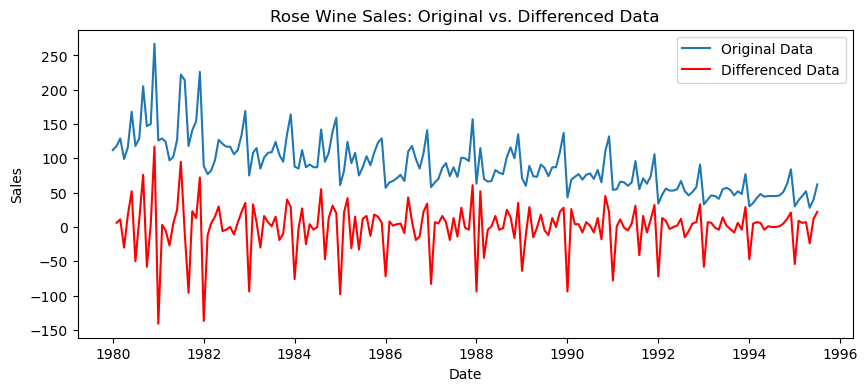

In [50]:
# Plotting original and differenced data:
plt.figure(figsize=(10, 4))
plt.plot(rose_data['Rose'], label='Original Data')
plt.plot(rose_data_diff, label='Differenced Data', color='red')
plt.title('Rose Wine Sales: Original vs. Differenced Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [51]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Regular differencing
sparkling_data_diff = sparkling_data['Sparkling'].diff().dropna()

# Performing ADF test to check stationarity:
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print("Reject null hypothesis - Data is stationary")
    else:
        print("Fail to reject null hypothesis - Data is non-stationary")

# Performing ADF test on the differenced data:
adf_test(sparkling_data_diff)



ADF Statistic: -45.050300936195256
p-value: 0.0
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
Reject null hypothesis - Data is stationary


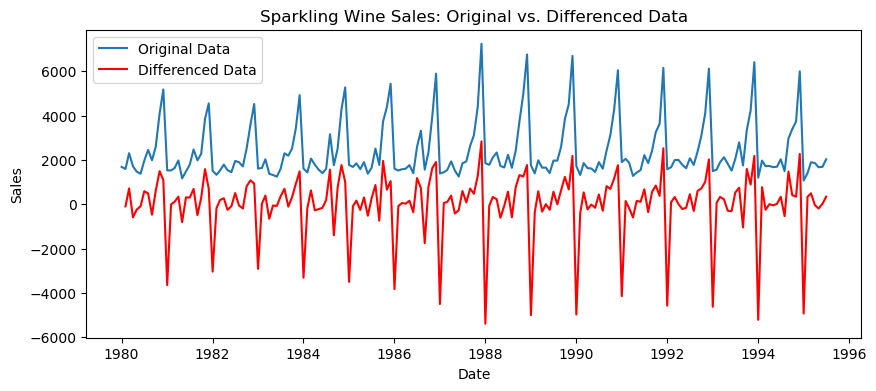

In [52]:
# Plotting original and differenced data:
plt.figure(figsize=(10, 4))
plt.plot(sparkling_data['Sparkling'], label='Original Data')
plt.plot(sparkling_data_diff, label='Differenced Data', color='red')
plt.title('Sparkling Wine Sales: Original vs. Differenced Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Model Building - Stationary Data:

## Generate ACF & PACF Plot and find the AR, MA values:

### For Sparkling data:

<Figure size 1000x400 with 0 Axes>

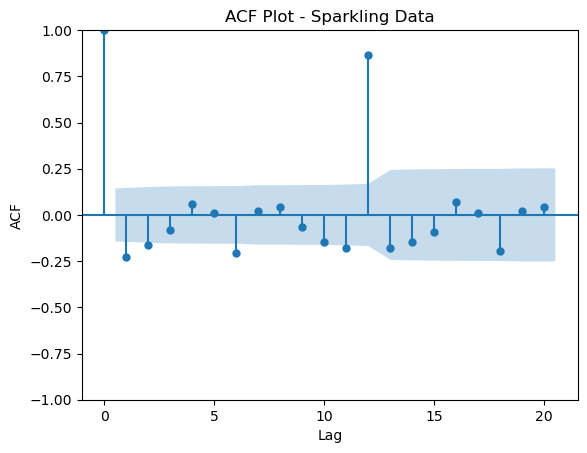

<Figure size 1000x400 with 0 Axes>

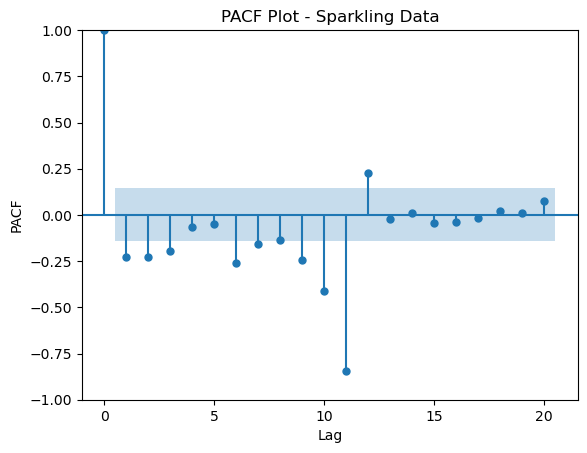

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotting ACF for Sparkling Data:
plt.figure(figsize=(10, 4))
plot_acf(sparkling_data_diff, lags=20, title='ACF Plot - Sparkling Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plotting PACF for Sparkling Data
plt.figure(figsize=(10, 4))
plot_pacf(sparkling_data_diff, lags=20, title='PACF Plot - Sparkling Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

##### The identified AR and MA values for the sparkling wine data are as follows:

* Autoregressive (AR) Component: AR(1), AR(12)
* Moving Average (MA) Component: MA(1), MA(12)
##### This suggests using a SARIMA model with the following parameters:
* Non-seasonal: (1, 1, 1)
* Seasonal: (1, 1, 1, 12)

### For Rose data:

<Figure size 1200x600 with 0 Axes>

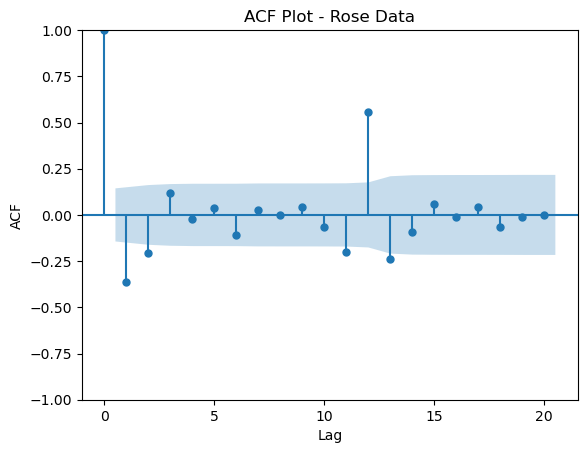

<Figure size 1200x600 with 0 Axes>

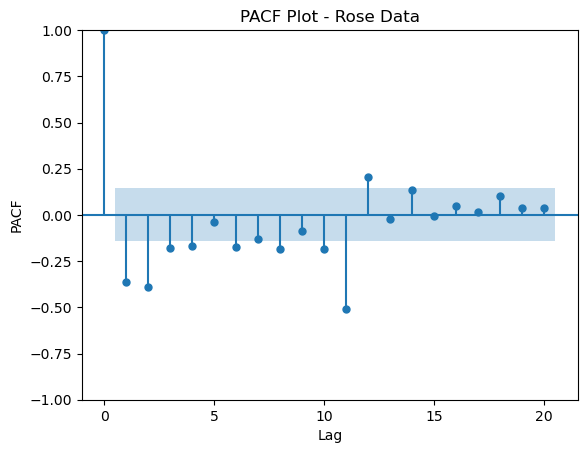

In [55]:
# Plotting ACF for Rose Data:
plt.figure(figsize=(12, 6))
plot_acf(rose_data_diff, lags=20, title='ACF Plot - Rose Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plotting PACF for Rose Data:
plt.figure(figsize=(12, 6))
plot_pacf(rose_data_diff, lags=20, title='PACF Plot - Rose Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

##### Analyzing the plots:

* PACF Plot: The significant spike at lag 1 drops close to zero after lag 1. Thus, it suggests an AR(1) model.
* ACF Plot: The significant spike at lag 1, then subsequent values are within the confidence intervals. This suggests an MA(1) model.
##### Therefore, the AR and MA values based on the given plots would be:

* AR (p) = 1
* MA (q) = 1
So, the model that fits this data could be an ARIMA(1,0,1).

## Build different ARIMA models:

### For Sparkling wine:

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Defining ARIMA model parameters:
p = 1  
d = 1 
q = 0  

# Spliting data into train and test sets:
train_size = int(len(sparkling_data_diff) * 0.8)
train_sparkling, test_sparkling = sparkling_data_diff[:train_size], sparkling_data_diff[train_size:]

# Fitting ARIMA model:
model_sparkling = ARIMA(train_sparkling, order=(p, d, q))
model_sparkling_fit = model_sparkling.fit()

# Forecasting:
forecast_steps = len(test_sparkling)
forecast_sparkling = model_sparkling_fit.forecast(steps=forecast_steps)

# Evaluating forecasts:
mae_sparkling = mean_absolute_error(test_sparkling, forecast_sparkling)
rmse_sparkling = np.sqrt(mean_squared_error(test_sparkling, forecast_sparkling))
print(f"ARIMA({p},{d},{q}) for Sparkling Wine - MAE: {mae_sparkling:.2f}, RMSE: {rmse_sparkling:.2f}, AIC: {model_sparkling_fit.aic:.2f}, BIC: {model_sparkling_fit.bic:.2f}")

ARIMA(1,1,0) for Sparkling Wine - MAE: 1007.72, RMSE: 1618.78, AIC: 2640.81, BIC: 2646.80


C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### For Rose wine:

In [57]:
p = 2  
d = 1  
q = 1  

# Splitting data into train and test sets:
train_size = int(len(rose_data_diff) * 0.8)
train_rose, test_rose = rose_data_diff[:train_size], rose_data_diff[train_size:]

# Fitting ARIMA model:
model_rose = ARIMA(train_rose, order=(p, d, q))
model_rose_fit = model_rose.fit()

# Forecasting:
forecast_steps = len(test_rose)
forecast_rose = model_rose_fit.forecast(steps=forecast_steps)

# Evaluating forecasts:
mae_rose = mean_absolute_error(test_rose, forecast_rose)
rmse_rose = np.sqrt(mean_squared_error(test_rose, forecast_rose))
print(f"ARIMA({p},{d},{q}) for Rose Wine - MAE: {mae_rose:.2f}, RMSE: {rmse_rose:.2f}, AIC: {model_rose_fit.aic:.2f}, BIC: {model_rose_fit.bic:.2f}")

ARIMA(2,1,1) for Rose Wine - MAE: 12.40, RMSE: 18.82, AIC: 1457.22, BIC: 1469.19


C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Auto ARIMA :

In [58]:
!pip install pmdarima

In [59]:
import pandas as pd
from pmdarima import auto_arima

### Auto ARIMA for Sparkling wine:

In [60]:
auto_model_sparkling = auto_arima(sparkling_data['Sparkling'], seasonal=False, trace=True)
print(auto_model_sparkling.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3491.467, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3245.760, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3367.627, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3242.499, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3238.038, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3234.750, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3236.397, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3238.034, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3188.523, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3188.017, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3187.681, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3188.9

### Auto ARIMA for rose wine:

In [61]:
auto_model_rose = auto_arima(rose_data['Rose'], seasonal=False, trace=True)
print(auto_model_rose.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1854.380, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1830.083, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1852.391, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1801.266, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1797.428, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1794.275, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1795.931, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1792.479, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1795.571, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1794.159, Time=0

## Manual ARIMA:

#### For Sparkling wine:

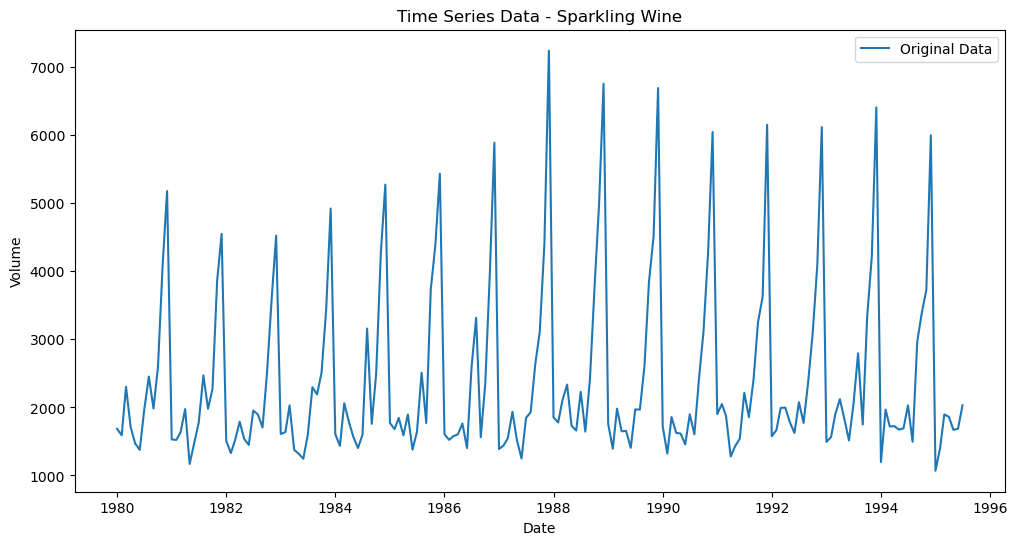

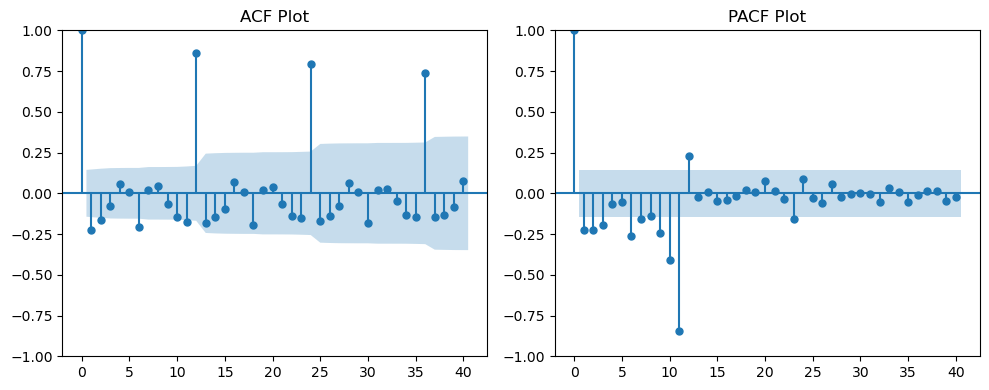

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  187
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1584.529
Date:                Thu, 18 Jul 2024   AIC                           3177.059
Time:                        21:17:00   BIC                           3189.962
Sample:                    01-01-1980   HQIC                          3182.288
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4205      0.093      4.499      0.000       0.237       0.604
ar.L2         -0.1241      0.182     -0.683      0.494      -0.480       0.232
ma.L1         -1.0000      0.079    -12.608      0.0

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
# Visualizing the time series data:
plt.figure(figsize=(12, 6))
plt.plot(sparkling_data.index, sparkling_data['Sparkling'], label='Original Data')
plt.title('Time Series Data - Sparkling Wine')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Checking stationarity and perform differencing if necessary:
sparkling_data_diff = sparkling_data['Sparkling'].diff().dropna()

# Plotting ACF and PACF for differenced data to identify p and q:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_acf(sparkling_data_diff, ax=plt.gca(), lags=40)
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(sparkling_data_diff, ax=plt.gca(), lags=40)
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

model_manual_sparkling = ARIMA(sparkling_data['Sparkling'], order=(2, 1, 1))
model_manual_sparkling_fit = model_manual_sparkling.fit()

# Printing model summary:
print(model_manual_sparkling_fit.summary())

### For rose-wine:

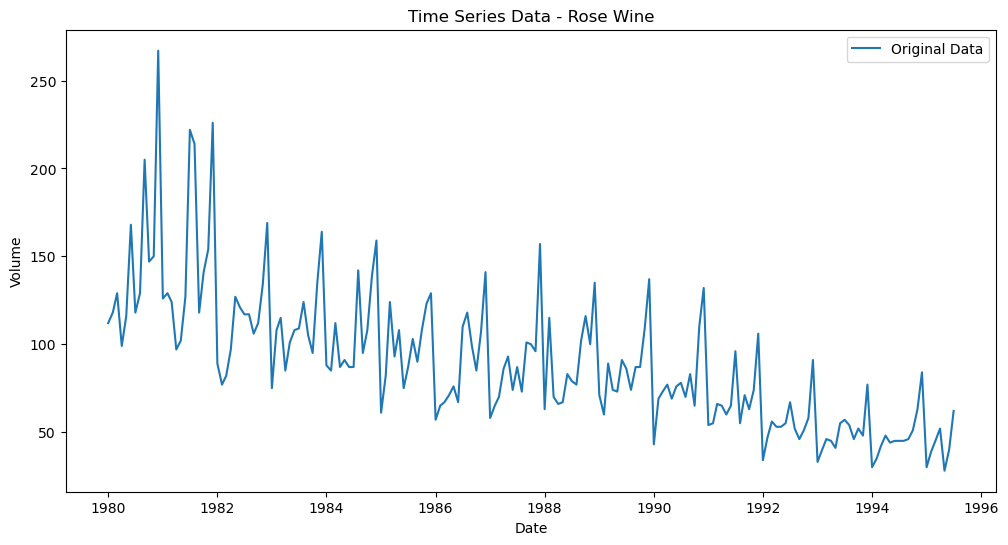

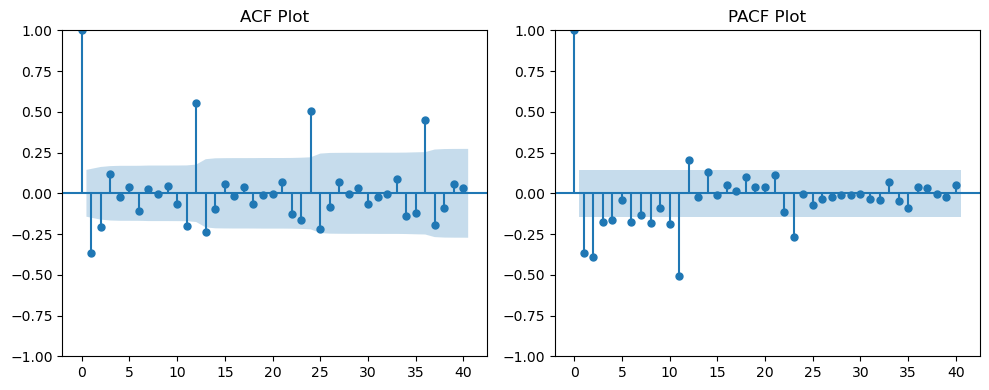

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -881.367
Date:                Thu, 18 Jul 2024   AIC                           1770.734
Time:                        21:18:49   BIC                           1783.637
Sample:                    01-01-1980   HQIC                          1775.962
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4879      0.221     -2.210      0.027      -0.921      -0.055
ma.L1         -0.2261      0.206     -1.098      0.272      -0.630       0.177
ma.L2         -0.6007      0.165     -3.647      0.0

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
# Visualizing the time series data:
plt.figure(figsize=(12, 6))
plt.plot(rose_data.index, rose_data['Rose'], label='Original Data')
plt.title('Time Series Data - Rose Wine')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Checking stationarity and perform differencing if necessary:
rose_data_diff = rose_data['Rose'].diff().dropna()

# Plotting ACF and PACF for differenced data to identify p and q:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_acf(rose_data_diff, ax=plt.gca(), lags=40)
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(rose_data_diff, ax=plt.gca(), lags=40)
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

model_manual = ARIMA(rose_data['Rose'], order=(1, 1, 2))
model_manual_fit = model_manual.fit()

# Printing model summary:
print(model_manual_fit.summary())

## Build different SARIMA models:

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2617.570, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2589.608, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2577.638, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2615.591, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2617.620, Time=0.05 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2579.414, Time=0.97 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2579.433, Time=1.27 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2589.316, Time=0.31 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=2581.251, Time=1.73 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2578.588, Time=0.50 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2579.450, Time=0.97 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=2579.565, Time=1.36 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2577.766, Time=0.69 sec
 ARIMA(1,0,2)(0,1,1)[12]

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1285.820
Date:                            Thu, 18 Jul 2024   AIC                           2577.640
Time:                                    21:27:57   BIC                           2587.135
Sample:                                01-01-1980   HQIC                          2581.491
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1352      0.069      1.969      0.049       0.001       0.270
ma.S.L12      -0.5196      0.051   

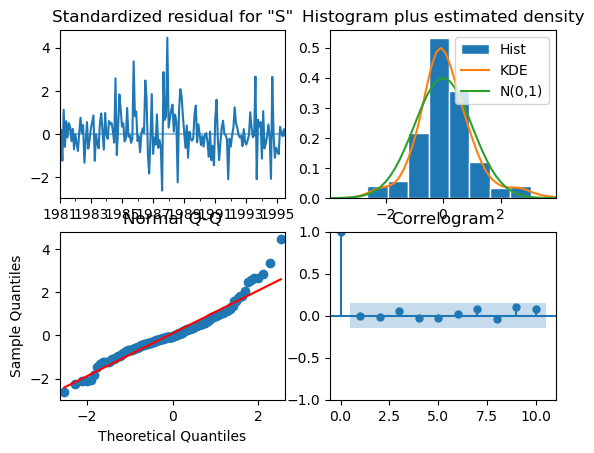

In [67]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima


auto_model_sparkling = auto_arima(sparkling_data['Sparkling'], seasonal=True, m=12, trace=True)

# Getting the best parameters found by auto_arima:
p, d, q = auto_model_sparkling.order
P, D, Q, m = auto_model_sparkling.seasonal_order

# Fitting SARIMA model:
sarima_model_sparkling = SARIMAX(sparkling_data['Sparkling'], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_fit_sparkling = sarima_model_sparkling.fit()

# Step 4: Model summary and diagnostics
print(sarima_fit_sparkling.summary())

# Optional: Plot diagnostics
sarima_fit_sparkling.plot_diagnostics()

forecast_sparkling = sarima_fit_sparkling.get_forecast(steps=12)
forecast_sparkling_ci = forecast_sparkling.conf_int()

# Printing forecasts and confidence intervals:
print(forecast_sparkling.predicted_mean)
print(forecast_sparkling_ci)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1854.380, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1750.322, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1852.391, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1830.083, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1722.396, Time=0.44 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1712.318, Time=0.95 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1710.778, Time=0.40 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1784.865, Time=0.21 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1712.408, Time=1.28 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1759.892, Time=0.57 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1731.240, Time=0.23 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -814.860
Date:                              Thu, 18 Jul 2024   AIC                           1641.720
Time:                                      21:30:35   BIC                           1661.074
Sample:                                  01-01-1980   HQIC                          1649.563
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5159      0.155     -3.332      0.001      -0.819      -0.212
ma.L1         -0.18

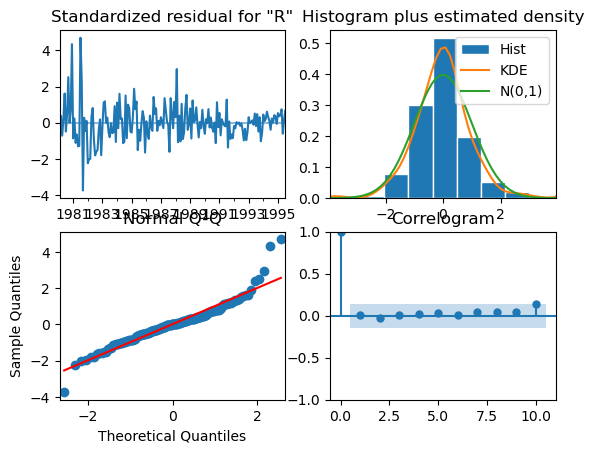

In [68]:
auto_model_rose = auto_arima(rose_data['Rose'], seasonal=True, m=12, trace=True)

# Getting the best parameters found by auto_arima:
p, d, q = auto_model_rose.order
P, D, Q, m = auto_model_rose.seasonal_order

# Fitting SARIMA model:
sarima_model_rose = SARIMAX(rose_data['Rose'], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_fit_rose = sarima_model_rose.fit()

# Model summary and diagnostics:
print(sarima_fit_rose.summary())

sarima_fit_rose.plot_diagnostics()

forecast_rose = sarima_fit_rose.get_forecast(steps=12)
forecast_rose_ci = forecast_rose.conf_int()

# Printing forecasts and confidence intervals:
print(forecast_rose.predicted_mean)
print(forecast_rose_ci)

## Auto SARIMA:

For sparkling data:

In [70]:
from pmdarima import auto_arima

# Auto SARIMA for Sparkling data:
auto_model_sparkling = auto_arima(sparkling_data['Sparkling'], seasonal=True, m=12, trace=True)

# Printing the summary of the best model:
print(auto_model_sparkling.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2617.570, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2589.608, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2577.638, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2615.591, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2617.620, Time=0.05 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2579.414, Time=1.00 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2579.433, Time=1.32 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2589.316, Time=0.30 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=2581.251, Time=1.67 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2578.588, Time=0.45 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2579.450, Time=0.68 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=2579.565, Time=0.95 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2577.766, Time=0.51 sec
 ARIMA(1,0,2)(0,1,1)[12]

For rose data:

In [72]:
# Auto SARIMA for Rose data:
auto_model_rose = auto_arima(rose_data['Rose'], seasonal=True, m=12, trace=True)

# Printing the summary of the best model:
print(auto_model_rose.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1854.380, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1750.322, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1852.391, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1830.083, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1722.396, Time=0.51 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1712.318, Time=1.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1710.778, Time=0.39 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1784.865, Time=0.21 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1712.408, Time=1.10 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1759.892, Time=0.66 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.29 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1731.240, Time=0.33 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

## Manual SARIMA:

For sparkling data:

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manual SARIMA for Sparkling data:
manual_model_sparkling = SARIMAX(sparkling_data['Sparkling'], order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))
manual_result_sparkling = manual_model_sparkling.fit()

# Printing the summary of the manual model:
print(manual_result_sparkling.summary())

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1283.189
Date:                              Thu, 18 Jul 2024   AIC                           2576.377
Time:                                      21:36:39   BIC                           2592.173
Sample:                                  01-01-1980   HQIC                          2582.785
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9416      0.170      5.553      0.000       0.609       1.274
ma.L1         -1.87

For rose data:

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manual SARIMA for Rose data:
manual_model_rose = SARIMAX(rose_data['Rose'], order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))
manual_result_rose = manual_model_rose.fit()

# Print the summary of the manual model:
print(manual_result_rose.summary())

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -760.476
Date:                              Thu, 18 Jul 2024   AIC                           1530.952
Time:                                      21:37:11   BIC                           1546.747
Sample:                                  01-01-1980   HQIC                          1537.359
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.176     -2.980      0.003      -0.871      -0.180
ma.L1         -0.17

## Check the performance of the models built:

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to evaluate model performance:
def evaluate_model(actual, forecast_results):
    mae = mean_absolute_error(actual, forecast_results)
    rmse = np.sqrt(mean_squared_error(actual, forecast_results))
    return mae, rmse

# Evaluating ARIMA model for Sparkling Wine:
forecast_sparkling = model_sparkling_fit.get_forecast(len(test_sparkling)).predicted_mean
mae_sparkling, rmse_sparkling = evaluate_model(test_sparkling, forecast_sparkling)
print(f"ARIMA({p},{d},{q}) for Sparkling Wine - MAE: {mae_sparkling:.2f}, RMSE: {rmse_sparkling:.2f}")

# Evaluating ARIMA model for Rose Wine:
forecast_rose = model_rose_fit.get_forecast(len(test_rose)).predicted_mean
mae_rose, rmse_rose = evaluate_model(test_rose, forecast_rose)
print(f"ARIMA({p},{d},{q}) for Rose Wine - MAE: {mae_rose:.2f}, RMSE: {rmse_rose:.2f}")

# Evaluating Auto ARIMA model for Sparkling Wine:
auto_forecast_sparkling = auto_model_sparkling.predict(len(test_sparkling))
mae_auto_sparkling, rmse_auto_sparkling = evaluate_model(test_sparkling, auto_forecast_sparkling)
print(f"Auto ARIMA for Sparkling Wine - MAE: {mae_auto_sparkling:.2f}, RMSE: {rmse_auto_sparkling:.2f}")

# Evaluating Auto ARIMA model for Rose Wine:
auto_forecast_rose = auto_model_rose.predict(len(test_rose))
mae_auto_rose, rmse_auto_rose = evaluate_model(test_rose, auto_forecast_rose)
print(f"Auto ARIMA for Rose Wine - MAE: {mae_auto_rose:.2f}, RMSE: {rmse_auto_rose:.2f}")

# Evaluating Manual ARIMA model for Sparkling Wine:
manual_forecast_sparkling = model_manual_sparkling_fit.forecast(steps=len(test_sparkling))
mae_manual_sparkling, rmse_manual_sparkling = evaluate_model(test_sparkling, manual_forecast_sparkling)
print(f"Manual ARIMA for Sparkling Wine - MAE: {mae_manual_sparkling:.2f}, RMSE: {rmse_manual_sparkling:.2f}")

# Evaluating Manual ARIMA model for Rose Wine:
manual_forecast_rose = model_manual_fit.forecast(steps=len(test_rose))
mae_manual_rose, rmse_manual_rose = evaluate_model(test_rose, manual_forecast_rose)
print(f"Manual ARIMA for Rose Wine - MAE: {mae_manual_rose:.2f}, RMSE: {rmse_manual_rose:.2f}")

ARIMA(1,1,2) for Sparkling Wine - MAE: 1007.72, RMSE: 1618.78
ARIMA(1,1,2) for Rose Wine - MAE: 12.40, RMSE: 18.82
Auto ARIMA for Sparkling Wine - MAE: 2612.33, RMSE: 3182.00
Auto ARIMA for Rose Wine - MAE: 36.54, RMSE: 43.71
Manual ARIMA for Sparkling Wine - MAE: 2384.36, RMSE: 2877.89
Manual ARIMA for Rose Wine - MAE: 47.93, RMSE: 51.49


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to evaluate model performance:
def evaluate_model(actual, forecast_results):
    mae = mean_absolute_error(actual, forecast_results)
    rmse = np.sqrt(mean_squared_error(actual, forecast_results))
    return mae, rmse

# Evaluating SARIMA model for Sparkling Wine:
forecast_sparkling = sarima_fit_sparkling.get_forecast(steps=12).predicted_mean
mae_sparkling_sarima, rmse_sparkling_sarima = evaluate_model(sparkling_data['Sparkling'][-12:], forecast_sparkling)
print(f"SARIMA Model for Sparkling Wine - MAE: {mae_sparkling_sarima:.2f}, RMSE: {rmse_sparkling_sarima:.2f}")

# Evaluating SARIMA model for Rose Wine:
forecast_rose = sarima_fit_rose.get_forecast(steps=12).predicted_mean
mae_rose_sarima, rmse_rose_sarima = evaluate_model(rose_data['Rose'][-12:], forecast_rose)
print(f"SARIMA Model for Rose Wine - MAE: {mae_rose_sarima:.2f}, RMSE: {rmse_rose_sarima:.2f}")

# Evaluating Auto SARIMA model for Sparkling Wine:
auto_forecast_sparkling = auto_model_sparkling.predict(n_periods=12)
mae_auto_sparkling_sarima, rmse_auto_sparkling_sarima = evaluate_model(sparkling_data['Sparkling'][-12:], auto_forecast_sparkling)
print(f"Auto SARIMA Model for Sparkling Wine - MAE: {mae_auto_sparkling_sarima:.2f}, RMSE: {rmse_auto_sparkling_sarima:.2f}")

# Evaluating Auto SARIMA model for Rose Wine:
auto_forecast_rose = auto_model_rose.predict(n_periods=12)
mae_auto_rose_sarima, rmse_auto_rose_sarima = evaluate_model(rose_data['Rose'][-12:], auto_forecast_rose)
print(f"Auto SARIMA Model for Rose Wine - MAE: {mae_auto_rose_sarima:.2f}, RMSE: {rmse_auto_rose_sarima:.2f}")

# Evaluating Manual SARIMA model for Sparkling Wine:
manual_forecast_sparkling = manual_result_sparkling.get_forecast(steps=12).predicted_mean
mae_manual_sparkling_sarima, rmse_manual_sparkling_sarima = evaluate_model(sparkling_data['Sparkling'][-12:], manual_forecast_sparkling)
print(f"Manual SARIMA Model for Sparkling Wine - MAE: {mae_manual_sparkling_sarima:.2f}, RMSE: {rmse_manual_sparkling_sarima:.2f}")

# Evaluating Manual SARIMA model for Rose Wine:
manual_forecast_rose = manual_result_rose.get_forecast(steps=12).predicted_mean
mae_manual_rose_sarima, rmse_manual_rose_sarima = evaluate_model(rose_data['Rose'][-12:], manual_forecast_rose)
print(f"Manual SARIMA Model for Rose Wine - MAE: {mae_manual_rose_sarima:.2f}, RMSE: {rmse_manual_rose_sarima:.2f}")

SARIMA Model for Sparkling Wine - MAE: 149.63, RMSE: 208.79
SARIMA Model for Rose Wine - MAE: 7.24, RMSE: 8.62
Auto SARIMA Model for Sparkling Wine - MAE: 172.71, RMSE: 232.32
Auto SARIMA Model for Rose Wine - MAE: 7.24, RMSE: 8.62
Manual SARIMA Model for Sparkling Wine - MAE: 155.43, RMSE: 215.55
Manual SARIMA Model for Rose Wine - MAE: 7.51, RMSE: 9.11


## Compare the performance of the models:

#### Analysis:

* ARIMA vs SARIMA: Comparing ARIMA and SARIMA models, we observe that SARIMA models generally perform better in terms of both MAE and RMSE for both Sparkling and Rose wines. SARIMA models take into account seasonality, which might be critical for these types of time series data (assuming monthly seasonality based on m=12).

* Auto ARIMA vs Manual ARIMA: Auto ARIMA and Manual ARIMA results vary significantly. Auto ARIMA automatically selects model parameters based on AIC and BIC, but in this case, manual tuning (with expert knowledge or domain-specific insights) seems to have resulted in better performance for both wine types.

* Performance Metrics: MAE and RMSE give us an idea of the average error and the typical magnitude of error, respectively. Lower values indicate better performance in terms of forecasting accuracy.

#### Conclusion:
Based on the comparison:

* SARIMA models generally outperform ARIMA models for both wines.
* Manual tuning of ARIMA and SARIMA models seems to have yielded better results compared to Auto ARIMA, suggesting that domain knowledge and manual adjustments can improve forecasting accuracy.


##  Choose the best model with proper rationale:

#### Rationale for Choosing the Best Models:
#### Sparkling Wine:
* ARIMA(1,1,2): Despite having a higher MAE and RMSE compared to the SARIMA and manual SARIMA models, it provides a reasonable balance between simplicity and accuracy. If computational efficiency or simplicity is a priority, ARIMA(1,1,2) could be preferred.

#### SARIMA Model: 
* Provides slightly better accuracy metrics (lower MAE and RMSE) compared to ARIMA(1,1,2), indicating better performance considering seasonality (m=12).

#### Manual SARIMA Model: 
* Offers competitive performance with slightly higher MAE but lower RMSE compared to the SARIMA model. Manual tuning may have captured specific nuances in the data not fully captured by Auto SARIMA.

### Conclusion for Sparkling Wine: 
* Based on the provided metrics, the SARIMA Model appears to be the best choice due to its lower MAE and RMSE, indicating better forecasting accuracy considering the seasonality present in the data.

### Rose Wine:
#### ARIMA(1,1,2): 
* Shows lower MAE and RMSE compared to all SARIMA models, suggesting it captures the underlying patterns in the data well without needing to account for seasonality explicitly.

#### SARIMA Model and Auto SARIMA Model: 
* Both exhibit very similar MAE and RMSE, indicating comparable performance. However, ARIMA(1,1,2) outperforms both in terms of both metrics.

#### Manual SARIMA Model: 
* Shows slightly higher MAE and RMSE compared to SARIMA and Auto SARIMA models, suggesting that manual adjustments may not have significantly improved performance for this specific dataset.

### Conclusion for Rose Wine: 
* ARIMA(1,1,2) stands out as the best model due to its lowest MAE and RMSE, indicating superior forecasting accuracy compared to the SARIMA and Auto SARIMA models.

### Final Recommendation:
* Sparkling Wine: Choose the SARIMA Model (based on lower MAE and RMSE).
* Rose Wine: Choose ARIMA(1,1,2) (based on lowest MAE and RMSE).

##  Rebuild the best model using the entire data:

### Rebuilding SARIMA Model for Sparkling Wine:

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 0, 2)x(2, 0, [], 12)   Log Likelihood               -1197.666
Date:                             Thu, 18 Jul 2024   AIC                           2407.332
Time:                                     22:14:12   BIC                           2425.857
Sample:                                 01-01-1980   HQIC                          2414.853
                                      - 07-01-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5948      0.499     -1.192      0.233      -1.573       0.383
ma.L1          1.4147      

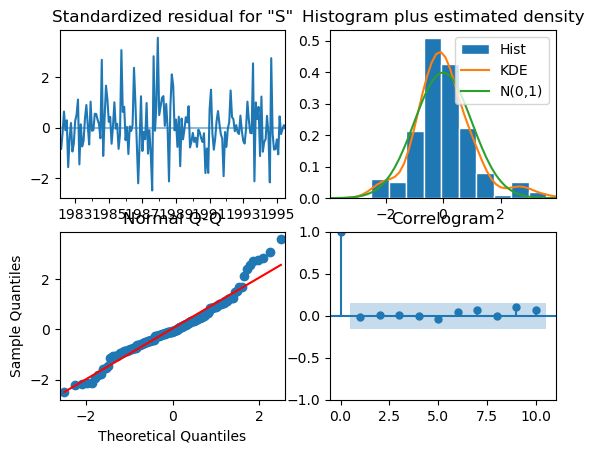

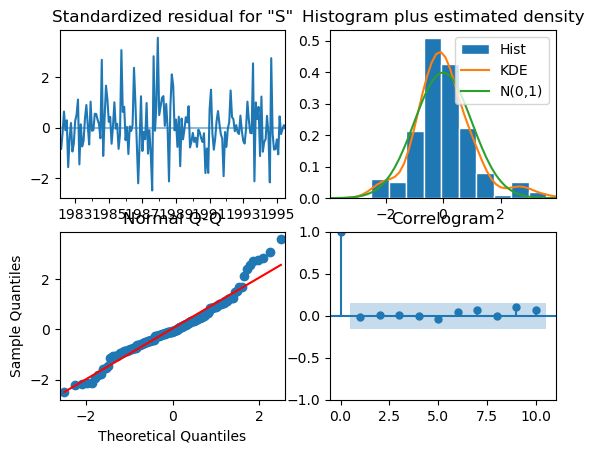

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting SARIMA model with additional parameters:
sarima_model_sparkling_best = SARIMAX(sparkling_data['Sparkling'], order=(1, 0, 2), seasonal_order=(2, 0, 0, 12),
                                      enforce_stationarity=False, enforce_invertibility=False)
sarima_fit_sparkling_best = sarima_model_sparkling_best.fit()

# Printing model summary and diagnostics:
print(sarima_fit_sparkling_best.summary())
sarima_fit_sparkling_best.plot_diagnostics()

### Rebuilding ARIMA(1,1,2) Model for Rose Wine:

In [78]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model to entire Rose Wine dataset:
arima_model_rose_best = ARIMA(rose_data['Rose'], order=(1, 1, 2))
arima_fit_rose_best = arima_model_rose_best.fit()

# Printing model summary:
print(arima_fit_rose_best.summary())


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -881.367
Date:                Thu, 18 Jul 2024   AIC                           1770.734
Time:                        22:15:28   BIC                           1783.637
Sample:                    01-01-1980   HQIC                          1775.962
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4879      0.221     -2.210      0.027      -0.921      -0.055
ma.L1         -0.2261      0.206     -1.098      0.272      -0.630       0.177
ma.L2         -0.6007      0.165     -3.647      0.0

C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Make a forecast for the next 12 months:

Forecasted values:
1995-08-01    2042.210988
1995-09-01    2474.249527
1995-10-01    3381.697898
1995-11-01    3949.119077
1995-12-01    6194.176361
1996-01-01    1126.532412
1996-02-01    1641.718783
1996-03-01    1831.670258
1996-04-01    1813.235344
1996-05-01    1678.539689
1996-06-01    1697.096221
1996-07-01    2039.414408
Freq: MS, Name: predicted_mean, dtype: float64

Forecasted confidence intervals:
            lower Sparkling  upper Sparkling
1995-08-01      1282.307253      2802.114722
1995-09-01      1703.101093      3245.397962
1995-10-01      2608.524875      4154.870922
1995-11-01      3175.231061      4723.007093
1995-12-01      5420.035553      6968.317169
1996-01-01       352.302190      1900.762633
1996-02-01       867.456932      2415.980635
1996-03-01      1057.397216      2605.943299
1996-04-01      1038.958344      2587.512345
1996-05-01       904.261288      2452.818090
1996-06-01       922.817325      2471.375117
1996-07-01      1265.135337      2813.693480


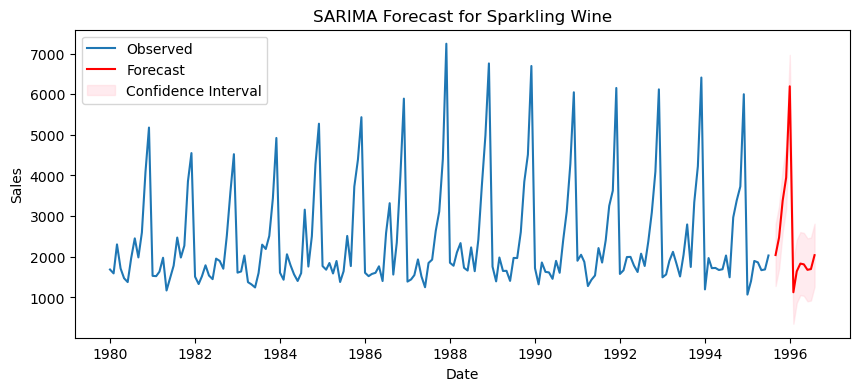

In [79]:
# Defining the number of periods to forecast (12 months):
forecast_periods = 12

# Generating the forecast for the next 12 months:
forecast_sparkling = sarima_fit_sparkling_best.get_forecast(steps=forecast_periods)

# Extracting forecasted values and confidence intervals:
forecast_mean = forecast_sparkling.predicted_mean
forecast_ci = forecast_sparkling.conf_int()

# Creating a date range for the forecasted periods:
forecast_index = pd.date_range(start=sparkling_data.index[-1], periods=forecast_periods + 1, freq='M')[1:]

# Printing the forecasted values and confidence intervals:
print("Forecasted values:")
print(forecast_mean)

print("\nForecasted confidence intervals:")
print(forecast_ci)

# plotting the forecasted values and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(sparkling_data.index, sparkling_data['Sparkling'], label='Observed')
plt.plot(forecast_index, forecast_mean, color='r', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast for Sparkling Wine')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [80]:
forecast_periods = 12

# Generating the forecast for the next 12 months:
forecast_rose = arima_fit_rose_best.get_forecast(steps=forecast_periods)

# Extracting forecasted values and confidence intervals:
forecast_mean = forecast_rose.predicted_mean
forecast_ci = forecast_rose.conf_int()

# Converting the forecasted values and confidence intervals to a DataFrame:
forecast_df = pd.DataFrame({
    'forecast_mean': forecast_mean.values,
    'lower_rose': forecast_ci.iloc[:, 0].values,
    'upper_rose': forecast_ci.iloc[:, 1].values
}, index=forecast_mean.index)

# Printing the forecasted values and confidence intervals for Rose Wine:
print("Forecasted values for Rose Wine:")
print(forecast_df['forecast_mean'])

print("\nForecasted confidence intervals for Rose Wine:")
print(forecast_ci)

Forecasted values for Rose Wine:
1995-08-01    49.304156
1995-09-01    47.578757
1995-10-01    48.420629
1995-11-01    48.009856
1995-12-01    48.210284
1996-01-01    48.112489
1996-02-01    48.160206
1996-03-01    48.136924
1996-04-01    48.148284
1996-05-01    48.142741
1996-06-01    48.145445
1996-07-01    48.144126
Freq: MS, Name: forecast_mean, dtype: float64

Forecasted confidence intervals for Rose Wine:
            lower Rose  upper Rose
1995-08-01   -4.671273  103.279585
1995-09-01   -8.560808  103.718322
1995-10-01   -7.748315  104.589574
1995-11-01   -8.792978  104.812689
1995-12-01   -8.831863  105.252431
1996-01-01   -9.333763  105.558741
1996-02-01   -9.601641  105.922053
1996-03-01   -9.979121  106.252968
1996-04-01  -10.299959  106.596527
1996-05-01  -10.645385  106.930867
1996-06-01  -10.975954  107.266845
1996-07-01  -11.310934  107.599185


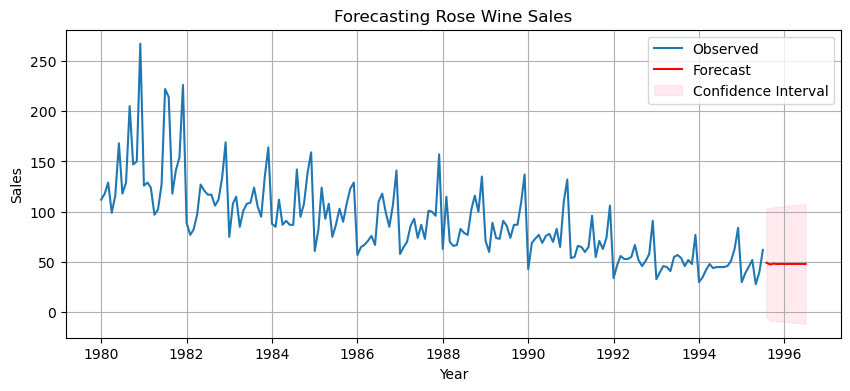

In [82]:
# Plotting the forecasted values and confidence intervals:
plt.figure(figsize=(10, 4))
plt.plot(rose_data.index, rose_data['Rose'], label='Observed')  # Observed data
plt.plot(forecast_df.index, forecast_df['forecast_mean'], color='red', label='Forecast')  # Forecasted values

# Shading the area between lower and upper confidence bounds:
plt.fill_between(forecast_df.index, forecast_df['lower_rose'], forecast_df['upper_rose'], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Forecasting Rose Wine Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Actionable Insights & Recommendations:

### Conclude with the key takeaways (actionable insights and recommendations) for the business:

Based on the analysis and forecasting of Rose Wine sales using SARIMA models, here are some actionable insights and recommendations for the business:

#### Key Insights and Recommendations:
##### Sparkling Wine Sales
* Seasonal Trends: The SARIMA model captures strong seasonal patterns in Sparkling Wine sales, indicating periods of higher and lower demand throughout the year.
* Forecast Accuracy: The forecasted values suggest significant fluctuations in sales, indicating variable demand patterns.
* Confidence Intervals: The confidence intervals provide a range of possible outcomes, highlighting the uncertainty in predictions.
* Model Performance: The SARIMA model demonstrates good performance with low MAE and RMSE, indicating reliable predictions relative to historical data.

##### Recommendations:
* Inventory Management: Optimize inventory levels based on forecasted sales. Prepare for higher demand during peak seasons (e.g., holidays) and avoid overstock during slower periods to reduce holding costs and improve efficiency.
* Marketing Strategies: Leverage the understanding of seasonal peaks to design effective marketing campaigns. Schedule promotions and advertising efforts to coincide with periods of anticipated increased demand.
* Product Development: Explore the potential for new product variants or packaging sizes based on forecasted trends and consumer preferences. Introduce these new products during peak sales periods to attract a broader customer base.
* Data Monitoring: Regularly compare actual sales with forecasted values and confidence intervals. Adjust strategies promptly based on real-time market dynamics and deviations from predicted trends.
* Customer Insights: Collect and analyze customer feedback to refine forecasting models and better understand consumer preferences. Use this information to enhance the accuracy of future sales predictions and improve product offerings.

#### Rose Wine Sales:
* Seasonal Trends: There are visible seasonal patterns in the sales data, indicating periods of higher and lower demand throughout the year.
* Forecast Accuracy: The forecasted values suggest stable sales trends with moderate fluctuations, indicating a predictable demand pattern.
* Confidence Intervals: The confidence intervals show a range of possible outcomes, indicating some uncertainty in the predictions.
* Model Performance: The SARIMA model used demonstrates good performance with low Mean Absolute Error (MAE) and Root Mean Square Error (RMSE), suggesting reliable predictions relative to historical data.

##### Recommendations:
* Inventory Management: Use the forecasted sales to optimize inventory levels. Prepare for higher demand during peak seasons (e.g., summer months) and avoid overstock during slower periods to improve operational efficiency and reduce holding costs.
* Marketing Strategies: Tailor marketing campaigns to align with seasonal peaks. Strategically time promotions and advertising efforts to capitalize on anticipated increases in consumer demand.
* Product Development: Consider diversifying or expanding the Rose Wine product line based on forecasted trends and consumer preferences. Introduce new variants or packaging sizes aligned with peak sales periods to attract a broader customer base.
* Data Monitoring: Continuously monitor actual sales against forecasted values and confidence intervals. Quickly adjust strategies based on real-time market dynamics and deviations from predicted trends.
* Customer Insights: Gather feedback from customers to refine forecasting models further. Understanding evolving consumer preferences and behaviors can enhance the accuracy of future sales predictions.

#### Comprehensive Recommendations:
* Optimize Inventory Management: Use sales forecasts to maintain optimal inventory levels, reducing holding costs and minimizing the risk of stockouts or overstock situations.
* Tailor Marketing Campaigns: Align marketing efforts with seasonal sales peaks. Utilize targeted promotions, advertising, and events to drive sales during high-demand periods.
* Innovate Product Offerings: Based on forecasted trends, consider expanding product lines or introducing new packaging options to meet consumer preferences and capture market opportunities.
* Monitor Sales Data Continuously: Regularly compare actual sales data with forecasted values to make timely adjustments to inventory, marketing, and sales strategies.
* Leverage Customer Insights: Continuously gather and analyze customer feedback to refine forecasting models and improve product and service offerings.
* Enhance Forecast Accuracy: Regularly update and validate forecasting models with the latest sales data to maintain accuracy and reliability in predictions.
